# Bank Loan EDA
****
By: RISHAV RAJ

# I. Problem Statement:
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The company wants to understand the driving factors (or driver variables) behind the loan default. i.e the variables which are strong in loan default.


###  II. Import Libraries and set required parameters

In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows',100) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

import random

###  1. Data Importing

In [2]:
# read data
loanapplicationdata= pd.read_csv('application_data.csv')

Get some insights of data

In [3]:
# get shape of data (rows, columns)
print(loanapplicationdata.shape)

(307511, 122)


In [4]:
loanapplicationdata.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
# get some insights of data
loanapplicationdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531      26.0000           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   
4                 1           0           0      Core staff           1.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [6]:
loanapplicationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# get the count, size and Unique value in each column of application data
loanapplicationdata.agg(['count','size','nunique'])

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
count        307511  307511              307511       307511        307511   
size         307511  307511              307511       307511        307511   
nunique      307511       2                   2            3             2   

         FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count             307511        307511            307511      307511   
size              307511        307511            307511      307511   
nunique                2            15              2548        5603   

         AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
count         307499           307233           306219            307511   
size          307511           307511           307511            307511   
nunique        13672             1002                7                 8   

         NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                 307511              307511             307511   
size                  307511              307511             307511   
nunique                    5                   6                  6   

         REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count                        307511      307511         307511   
size                         307511      307511         307511   
nunique                          81       17460          12574   

         DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
count               307511           307511       104582      307511   
size                307511           307511       307511      307511   
nunique              15688             6168           62           2   

         FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
count            307511           307511            307511      307511   
size             307511           307511            307511      307511   
nunique               2                2                 2           2   

         FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count        307511           211120           307509                307511   
size         307511           307511           307511                307511   
nunique           2               18               17                     3   

         REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
count                         307511                      307511   
size                          307511                      307511   
nunique                            3                           7   

         HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count                     307511                      307511   
size                      307511                      307511   
nunique                       24                           2   

         REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                        307511                       307511   
size                         307511                       307511   
nunique                           2                            2   

         REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count                    307511                  307511   
size                     307511                  307511   
nunique                       2                       2   

         LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  \
count                     307511             307511        134133   
size                      307511             307511        307511   
nunique                        2                 58        114584   

         EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
count          306851        246546          151450            127568   
size           307511        307511          307511            307511   
nunique        119831           814            2339              3780   

         YEARS_BEGINEXPLUATATION_AVG  Y

### 2. Data Quality Check and Missing Values

#### 2.a. percentage of missing values of the columns

In [8]:
# funcion to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [9]:
# get missign values of all columns
NA_column = column_wise_null_percentage(loanapplicationdata)
NA_column

SK_ID_CURR                    0.0000
TARGET                        0.0000
NAME_CONTRACT_TYPE            0.0000
CODE_GENDER                   0.0000
FLAG_OWN_CAR                  0.0000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY    13.5000
AMT_REQ_CREDIT_BUREAU_WEEK   13.5000
AMT_REQ_CREDIT_BUREAU_MON    13.5000
AMT_REQ_CREDIT_BUREAU_QRT    13.5000
AMT_REQ_CREDIT_BUREAU_YEAR   13.5000
Length: 122, dtype: float64

In [10]:
# identify columns only with null values
NA_column = NA_column[NA_column>0]
NA_column

AMT_GOODS_PRICE                 0.0900
NAME_TYPE_SUITE                 0.4200
OWN_CAR_AGE                    65.9900
OCCUPATION_TYPE                31.3500
EXT_SOURCE_1                   56.3800
EXT_SOURCE_2                    0.2100
EXT_SOURCE_3                   19.8300
APARTMENTS_AVG                 50.7500
BASEMENTAREA_AVG               58.5200
YEARS_BEGINEXPLUATATION_AVG    48.7800
YEARS_BUILD_AVG                66.5000
COMMONAREA_AVG                 69.8700
ELEVATORS_AVG                  53.3000
ENTRANCES_AVG                  50.3500
FLOORSMAX_AVG                  49.7600
FLOORSMIN_AVG                  67.8500
LANDAREA_AVG                   59.3800
LIVINGAPARTMENTS_AVG           68.3500
LIVINGAREA_AVG                 50.1900
NONLIVINGAPARTMENTS_AVG        69.4300
NONLIVINGAREA_AVG              55.1800
APARTMENTS_MODE                50.7500
BASEMENTAREA_MODE              58.5200
YEARS_BEGINEXPLUATATION_MODE   48.7800
YEARS_BUILD_MODE               66.5000
COMMONAREA_MODE          

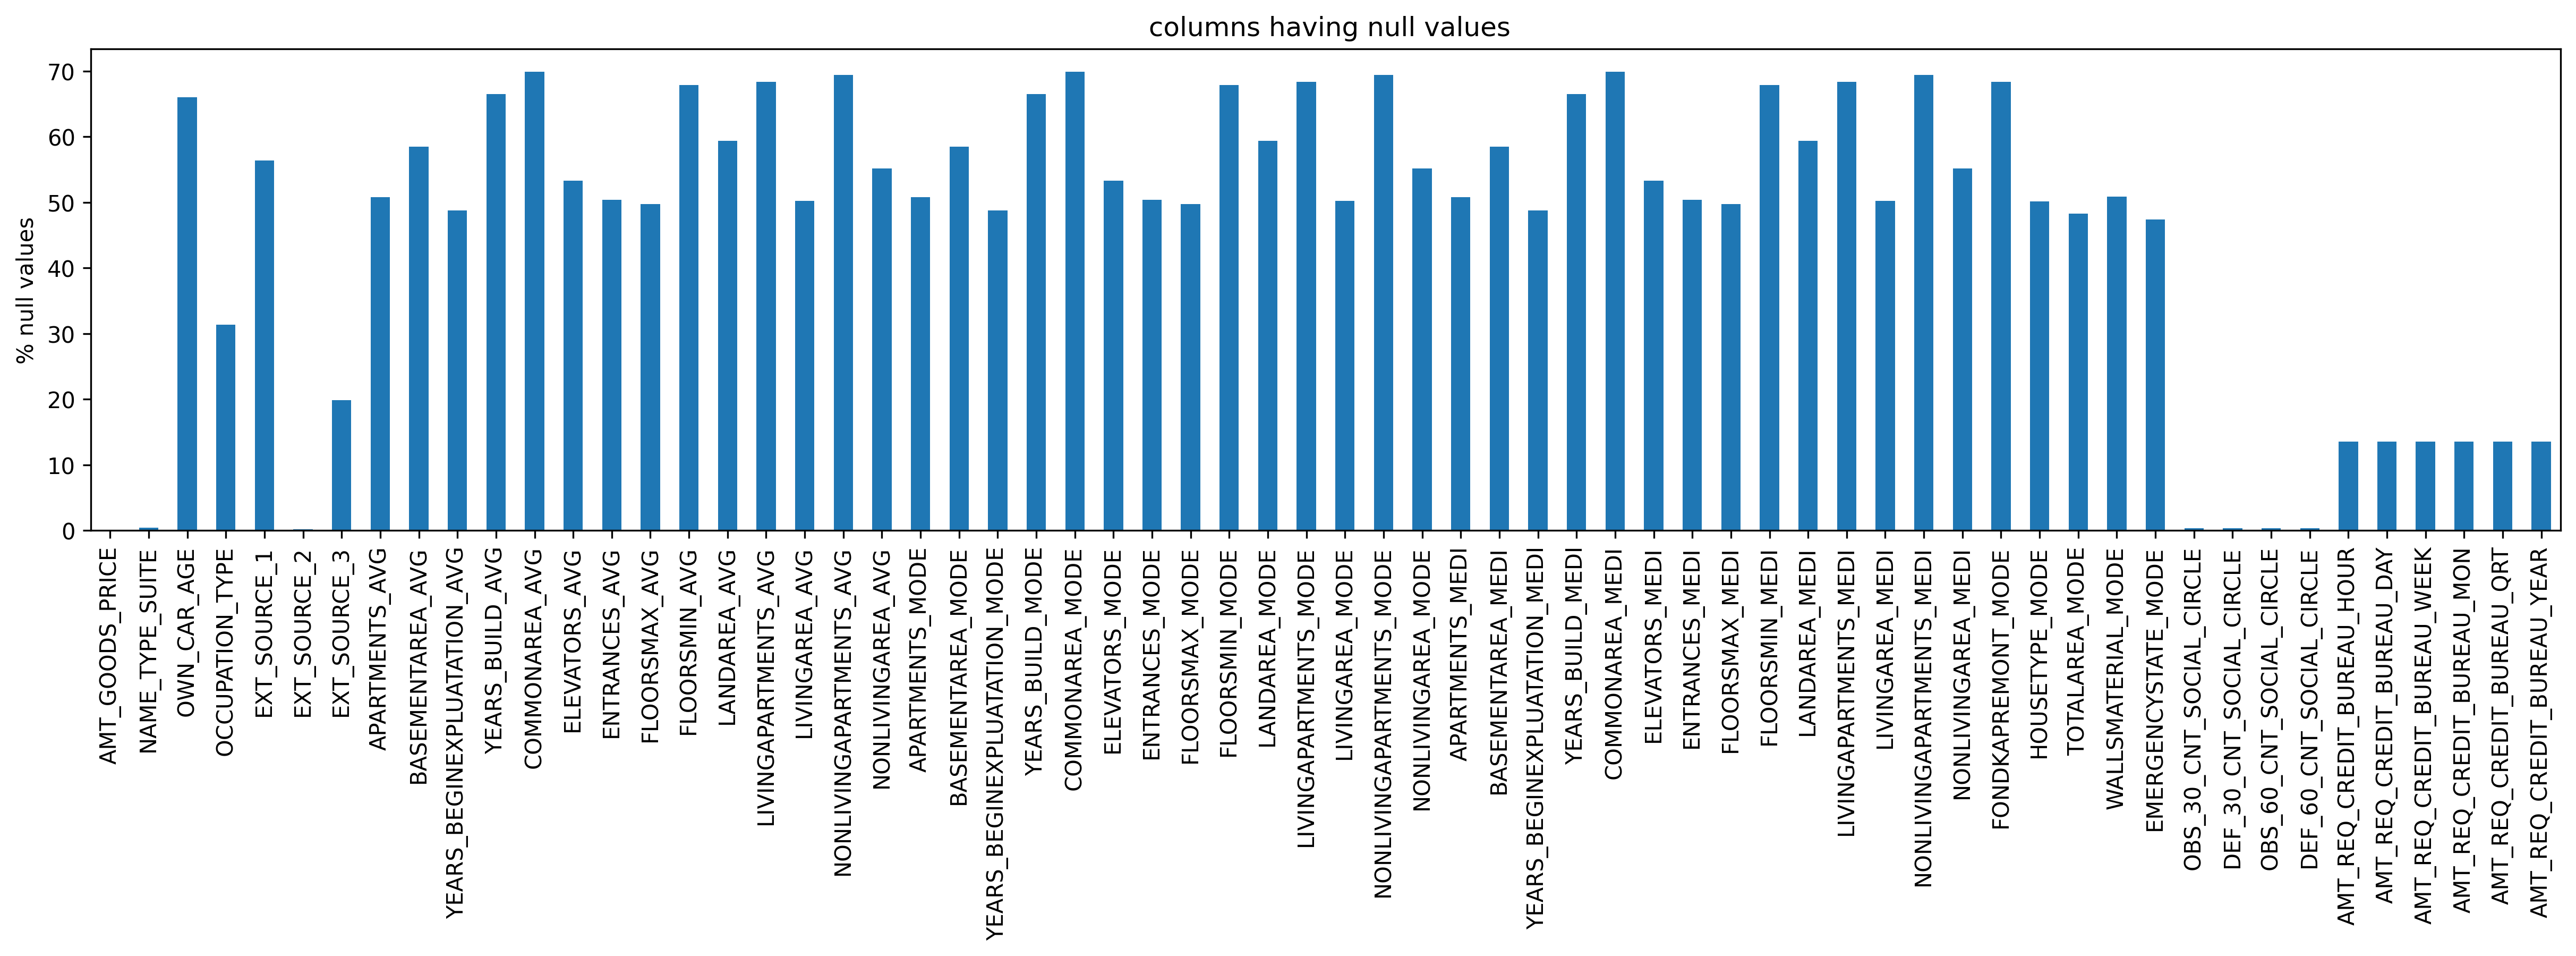

In [11]:
# grafical representation of columns having % null values
plt.figure(figsize= (20,4),dpi=300)
NA_column.plot(kind = 'bar')
plt.title (' columns having null values')
plt.ylabel('% null values')
plt.show()

#### 2.b. Identify and remove columns with high missing percentage (>50%)

In [12]:
# Get the column with null values more than 50%
NA_col_50 = NA_column[NA_column>50]
print("Number of columns having null value more than 50% :", len(NA_col_50.index))
print(NA_col_50)

Number of columns having null value more than 50% : 41
OWN_CAR_AGE                65.9900
EXT_SOURCE_1               56.3800
APARTMENTS_AVG             50.7500
BASEMENTAREA_AVG           58.5200
YEARS_BUILD_AVG            66.5000
COMMONAREA_AVG             69.8700
ELEVATORS_AVG              53.3000
ENTRANCES_AVG              50.3500
FLOORSMIN_AVG              67.8500
LANDAREA_AVG               59.3800
LIVINGAPARTMENTS_AVG       68.3500
LIVINGAREA_AVG             50.1900
NONLIVINGAPARTMENTS_AVG    69.4300
NONLIVINGAREA_AVG          55.1800
APARTMENTS_MODE            50.7500
BASEMENTAREA_MODE          58.5200
YEARS_BUILD_MODE           66.5000
COMMONAREA_MODE            69.8700
ELEVATORS_MODE             53.3000
ENTRANCES_MODE             50.3500
FLOORSMIN_MODE             67.8500
LANDAREA_MODE              59.3800
LIVINGAPARTMENTS_MODE      68.3500
LIVINGAREA_MODE            50.1900
NONLIVINGAPARTMENTS_MODE   69.4300
NONLIVINGAREA_MODE         55.1800
APARTMENTS_MEDI            50.7500


* Droped all columns from Dataframe for which missing value percentage are more than 50%.

`````````````
       'OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'
```````````

In [13]:
# removed 41 columns having null percentage more than 50%.
loanapplicationdata= loanapplicationdata.drop(NA_col_50.index, axis =1)
loanapplicationdata.shape

(307511, 81)

#### 2.c. identify columns with less missing missing values (<15%)

In [14]:
# Get columns having <15% null values
NA_col_15 = NA_column[NA_column<15]
print("Number of columns having null value less than 15% :", len(NA_col_15.index))
print(NA_col_15)

Number of columns having null value less than 15% : 13
AMT_GOODS_PRICE               0.0900
NAME_TYPE_SUITE               0.4200
EXT_SOURCE_2                  0.2100
OBS_30_CNT_SOCIAL_CIRCLE      0.3300
DEF_30_CNT_SOCIAL_CIRCLE      0.3300
OBS_60_CNT_SOCIAL_CIRCLE      0.3300
DEF_60_CNT_SOCIAL_CIRCLE      0.3300
AMT_REQ_CREDIT_BUREAU_HOUR   13.5000
AMT_REQ_CREDIT_BUREAU_DAY    13.5000
AMT_REQ_CREDIT_BUREAU_WEEK   13.5000
AMT_REQ_CREDIT_BUREAU_MON    13.5000
AMT_REQ_CREDIT_BUREAU_QRT    13.5000
AMT_REQ_CREDIT_BUREAU_YEAR   13.5000
dtype: float64


In [15]:
NA_col_15.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

* The columns having null values less than 15% are,

> 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'

* These columns shall be imputed with suitable values which shall be explained subsequently. 

In [16]:
# understand the insight of missing columns having <15% null values
loanapplicationdata[NA_col_15.index].describe()

AMT_GOODS_PRICE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
count      307233.0000   306851.0000               306490.0000   
mean       538396.2074        0.5144                    1.4222   
std        369446.4605        0.1911                    2.4010   
min         40500.0000        0.0000                    0.0000   
25%        238500.0000        0.3925                    0.0000   
50%        450000.0000        0.5660                    0.0000   
75%        679500.0000        0.6636                    2.0000   
max       4050000.0000        0.8550                  348.0000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count               306490.0000               306490.0000   
mean                     0.1434                    1.4053   
std                      0.4467                    2.3798   
min                      0.0000                    0.0000   
25%                      0.0000                    0.0000   
50%                      0.0000                    0.0000   
75%                      0.0000                    2.0000   
max                     34.0000                  344.0000   

       DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count               306490.0000                 265992.0000   
mean                     0.1000                      0.0064   
std                      0.3623                      0.0838   
min                      0.0000                      0.0000   
25%                      0.0000                      0.0000   
50%                      0.0000                      0.0000   
75%                      0.0000                      0.0000   
max                     24.0000                      4.0000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                265992.0000                 265992.0000   
mean                      0.0070                      0.0344   
std                       0.1108                      0.2047   
min                       0.0000                      0.0000   
25%                       0.0000                      0.0000   
50%                       0.0000                      0.0000   
75%                       0.0000                      0.0000   
max                       9.0000                      8.0000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                265992.0000                265992.0000   
mean                      0.2674                     0.2655   
std                       0.9160                     0.7941   
min                       0.0000                     0.0000   
25%                       0.0000                     0.0000   
50%                       0.0000                     0.0000   
75%                       0.0000                     0.0000   
max                      27.0000                   261.0000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                 265992.0000  
mean                       1.9000  
std                        1.8693  
min                        0.0000  
25%                        0.0000  
50%                        1.0000  
75%                        3.0000  
max                       25.0000

In [17]:
# identify unique values in the colums having <15% null value 
loanapplicationdata[NA_col_15.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_GOODS_PRICE                 1002
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
dtype: int64

* **For analysis of imputation selecetd 7 varibles.**
<br>Continuious variables:
``````
> 'EXT_SOURCE_2','AMT_GOODS_PRICE'
``````
Categorical variables:
`````````
> 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE'
`````````


##### Continous variable:

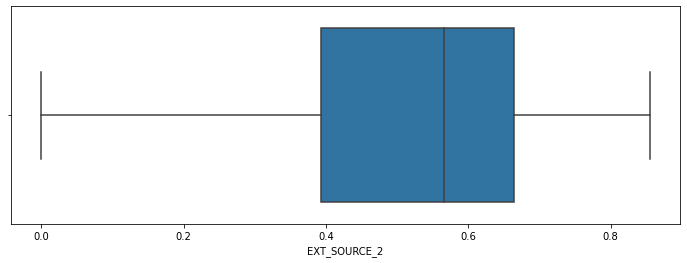

In [18]:
# Box plot for continuious variable
plt.figure(figsize=(12,4))
sns.boxplot(loanapplicationdata['EXT_SOURCE_2'])
plt.show()

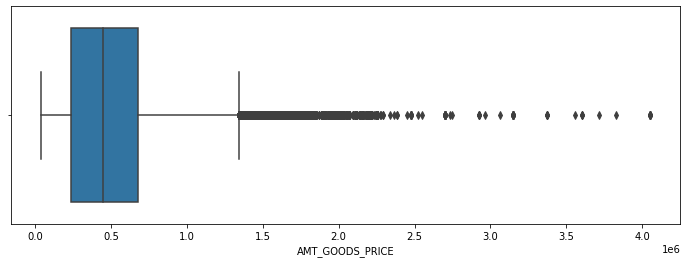

In [19]:
plt.figure(figsize=(12,4))
sns.boxplot(loanapplicationdata['AMT_GOODS_PRICE'])
plt.show()

Inference from box plot:
* for 'EXT_SOURCE_2' there is no outliers present. And there is no significant diffence observed between mean and median. However data look to be right skewed. So missing values can be imputed with median value: 0.565
* for 'AMT_GOODS_PRICE' there is significant number of outlier present in the data. SO data should be imputed with median value: 450000


#### Categorical variables:

In [20]:
# identify maximum frequency values
print('Maximum Frequncy categorical values are,')
print('NAME_TYPE_SUITE: ',loanapplicationdata['NAME_TYPE_SUITE'].mode()[0])
print('OBS_30_CNT_SOCIAL_CIRCLE:', loanapplicationdata['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE:', loanapplicationdata['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:', loanapplicationdata['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:', loanapplicationdata['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

Maximum Frequncy categorical values are,
NAME_TYPE_SUITE:  Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


For categorical vriable the value which should be imputed with maximum in frequency.<br>
So the value to be imputed are:<br>
NAME_TYPE_SUITE:  Unaccompanied<br>
OBS_30_CNT_SOCIAL_CIRCLE: 0.0 <br>
DEF_30_CNT_SOCIAL_CIRCLE: 0.0<br>
OBS_60_CNT_SOCIAL_CIRCLE: 0.0<br>
DEF_60_CNT_SOCIAL_CIRCLE: 0.0<br>


In [21]:
# Remove unwanted columns from application dataset for better analysis.

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

loanapplicationdata.drop(labels=unwanted,axis=1,inplace=True)

In [22]:
loanapplicationdata.shape

(307511, 42)

In [23]:
loanapplicationdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                    2.0000                    2.0000   
1                  School                    1.0000                    0.0000   
2              Gove

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns.

In [24]:
# For Code Gender column

print('CODE_GENDER: ',loanapplicationdata['CODE_GENDER'].unique())
print('No of values: ',loanapplicationdata[loanapplicationdata['CODE_GENDER']=='XNA'].shape[0])

XNA_count = loanapplicationdata[loanapplicationdata['CODE_GENDER']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(loanapplicationdata.index)*100,3)

print('% of XNA Values:',  per_XNA)

print('maximum frequency data :', loanapplicationdata['CODE_GENDER'].describe().top)

CODE_GENDER:  ['M' 'F' 'XNA']
No of values:  4
% of XNA Values: 0.001
maximum frequency data : F


Since, Female is having the majority and only 2 rows are having XNA values, we can impute those with Gender 'F' as there will be no impact on the dataset. Also there will no impact if we drop those rows.

In [25]:
# Dropping the XNA value in column 'CODE_GENDER' with "F" for the dataset

loanapplicationdata = loanapplicationdata.drop(loanapplicationdata.loc[loanapplicationdata['CODE_GENDER']=='XNA'].index)
loanapplicationdata[loanapplicationdata['CODE_GENDER']=='XNA'].shape

(0, 42)

In [26]:
# For Organization column
print('No of XNA values: ', loanapplicationdata[loanapplicationdata['ORGANIZATION_TYPE']=='XNA'].shape[0])

XNA_count = loanapplicationdata[loanapplicationdata['ORGANIZATION_TYPE']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(loanapplicationdata.index)*100,3)

print('% of XNA Values:',  per_XNA)

loanapplicationdata['ORGANIZATION_TYPE'].describe()

No of XNA values:  55374
% of XNA Values: 18.007


count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 153755 rows of which 27737 rows are having 'XNA' values. Which means 18% of the column is having this values.

In [27]:
# # Dropping the rows have 'XNA' values in the organization type column

loanapplicationdata = loanapplicationdata.drop(loanapplicationdata.loc[loanapplicationdata['ORGANIZATION_TYPE']=='XNA'].index)
loanapplicationdata[loanapplicationdata['ORGANIZATION_TYPE']=='XNA'].shape

(0, 42)

#### 2.d. Check the data type of all the columns and changed the data type.

In [28]:
loanapplicationdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                    2.0000                    2.0000   
1                  School                    1.0000                    0.0000   
2              Gove

In [29]:
# Casting variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

loanapplicationdata[numeric_columns]=loanapplicationdata[numeric_columns].apply(pd.to_numeric)
loanapplicationdata.head(5)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   
4      513000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   
4                      0.0287      -19932          -3038         -4311.0000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                    2.0000                    2.0000   
1                  School                    1.0000                    0.0000   
2              Gove

Following age/days columns are having -ve value, which needs to converted to  +ve value.

```
'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',
```

In [30]:
# Converting '-ve' values into '+ve' Values
loanapplicationdata['DAYS_BIRTH'] = loanapplicationdata['DAYS_BIRTH'].abs()
loanapplicationdata['DAYS_EMPLOYED'] = loanapplicationdata['DAYS_EMPLOYED'].abs()
loanapplicationdata['DAYS_REGISTRATION'] = loanapplicationdata['DAYS_REGISTRATION'].abs()
loanapplicationdata['DAYS_ID_PUBLISH'] = loanapplicationdata['DAYS_ID_PUBLISH'].abs()
loanapplicationdata['DAYS_LAST_PHONE_CHANGE'] = loanapplicationdata['DAYS_LAST_PHONE_CHANGE'].abs()

#### 2.e Checking the outlier for numerical variables:

In [31]:
# describe numeric columns
loanapplicationdata[numeric_columns].describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
count 252133.0000   252133.0000       252133.0000  252133.0000  252121.0000   
mean       0.0866        0.4985       175913.8989  611401.8213   27812.4496   
std        0.2813        0.7632       258853.5790  406529.3677   14647.8295   
min        0.0000        0.0000        25650.0000   45000.0000    1980.0000   
25%        0.0000        0.0000       112500.0000  277969.5000   17073.0000   
50%        0.0000        0.0000       157500.0000  521280.0000   25834.5000   
75%        0.0000        1.0000       211500.0000  829224.0000   35617.5000   
max        1.0000       19.0000    117000000.0000 4050000.0000  258025.5000   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count                 252133.0000 252133.0000    252133.0000   
mean                       0.0209  14769.1523      2384.1423   
std                        0.0139   3662.5627      2338.3277   
min                        0.0003   7489.0000         0.0000   
25%                        0.0100  11775.0000       767.0000   
50%                        0.0188  14573.0000      1648.0000   
75%                        0.0287  17563.0000      3175.0000   
max                        0.0725  25200.0000     17912.0000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
count        252133.0000      252133.0000              252133.0000   
mean           4635.4388        2800.6358                  12.2033   
std            3252.1615        1515.3655                   3.2998   
min               0.0000           0.0000                   0.0000   
25%            1845.0000        1487.0000                  10.0000   
50%            4265.0000        2886.0000                  12.0000   
75%            6952.0000        4177.0000                  15.0000   
max           22928.0000        7197.0000                  23.0000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                  252133.0000             252133.0000   
mean                        0.0496                  0.0898   
std                         0.2171                  0.2859   
min                         0.0000                  0.0000   
25%                         0.0000                  0.0000   
50%                         0.0000                  0.0000   
75%                         0.0000                  0.0000   
max                         1.0000                  1.0000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  
count             252133.0000              252133.0000             252132.0000  
mean                   0.2811                   0.2190                971.0409  
std                    0.4495                   0.4136                827.3089  
min                    0.0000                   0.0000                  0.0000  
25%                    0.0000                   0.0000                288.0000  
50%                    0.0000                   0.0000                763.0000  
75%                    1.0000                   0.0000               1578.0000  
max                    1.0000                   1.0000               4292.0000

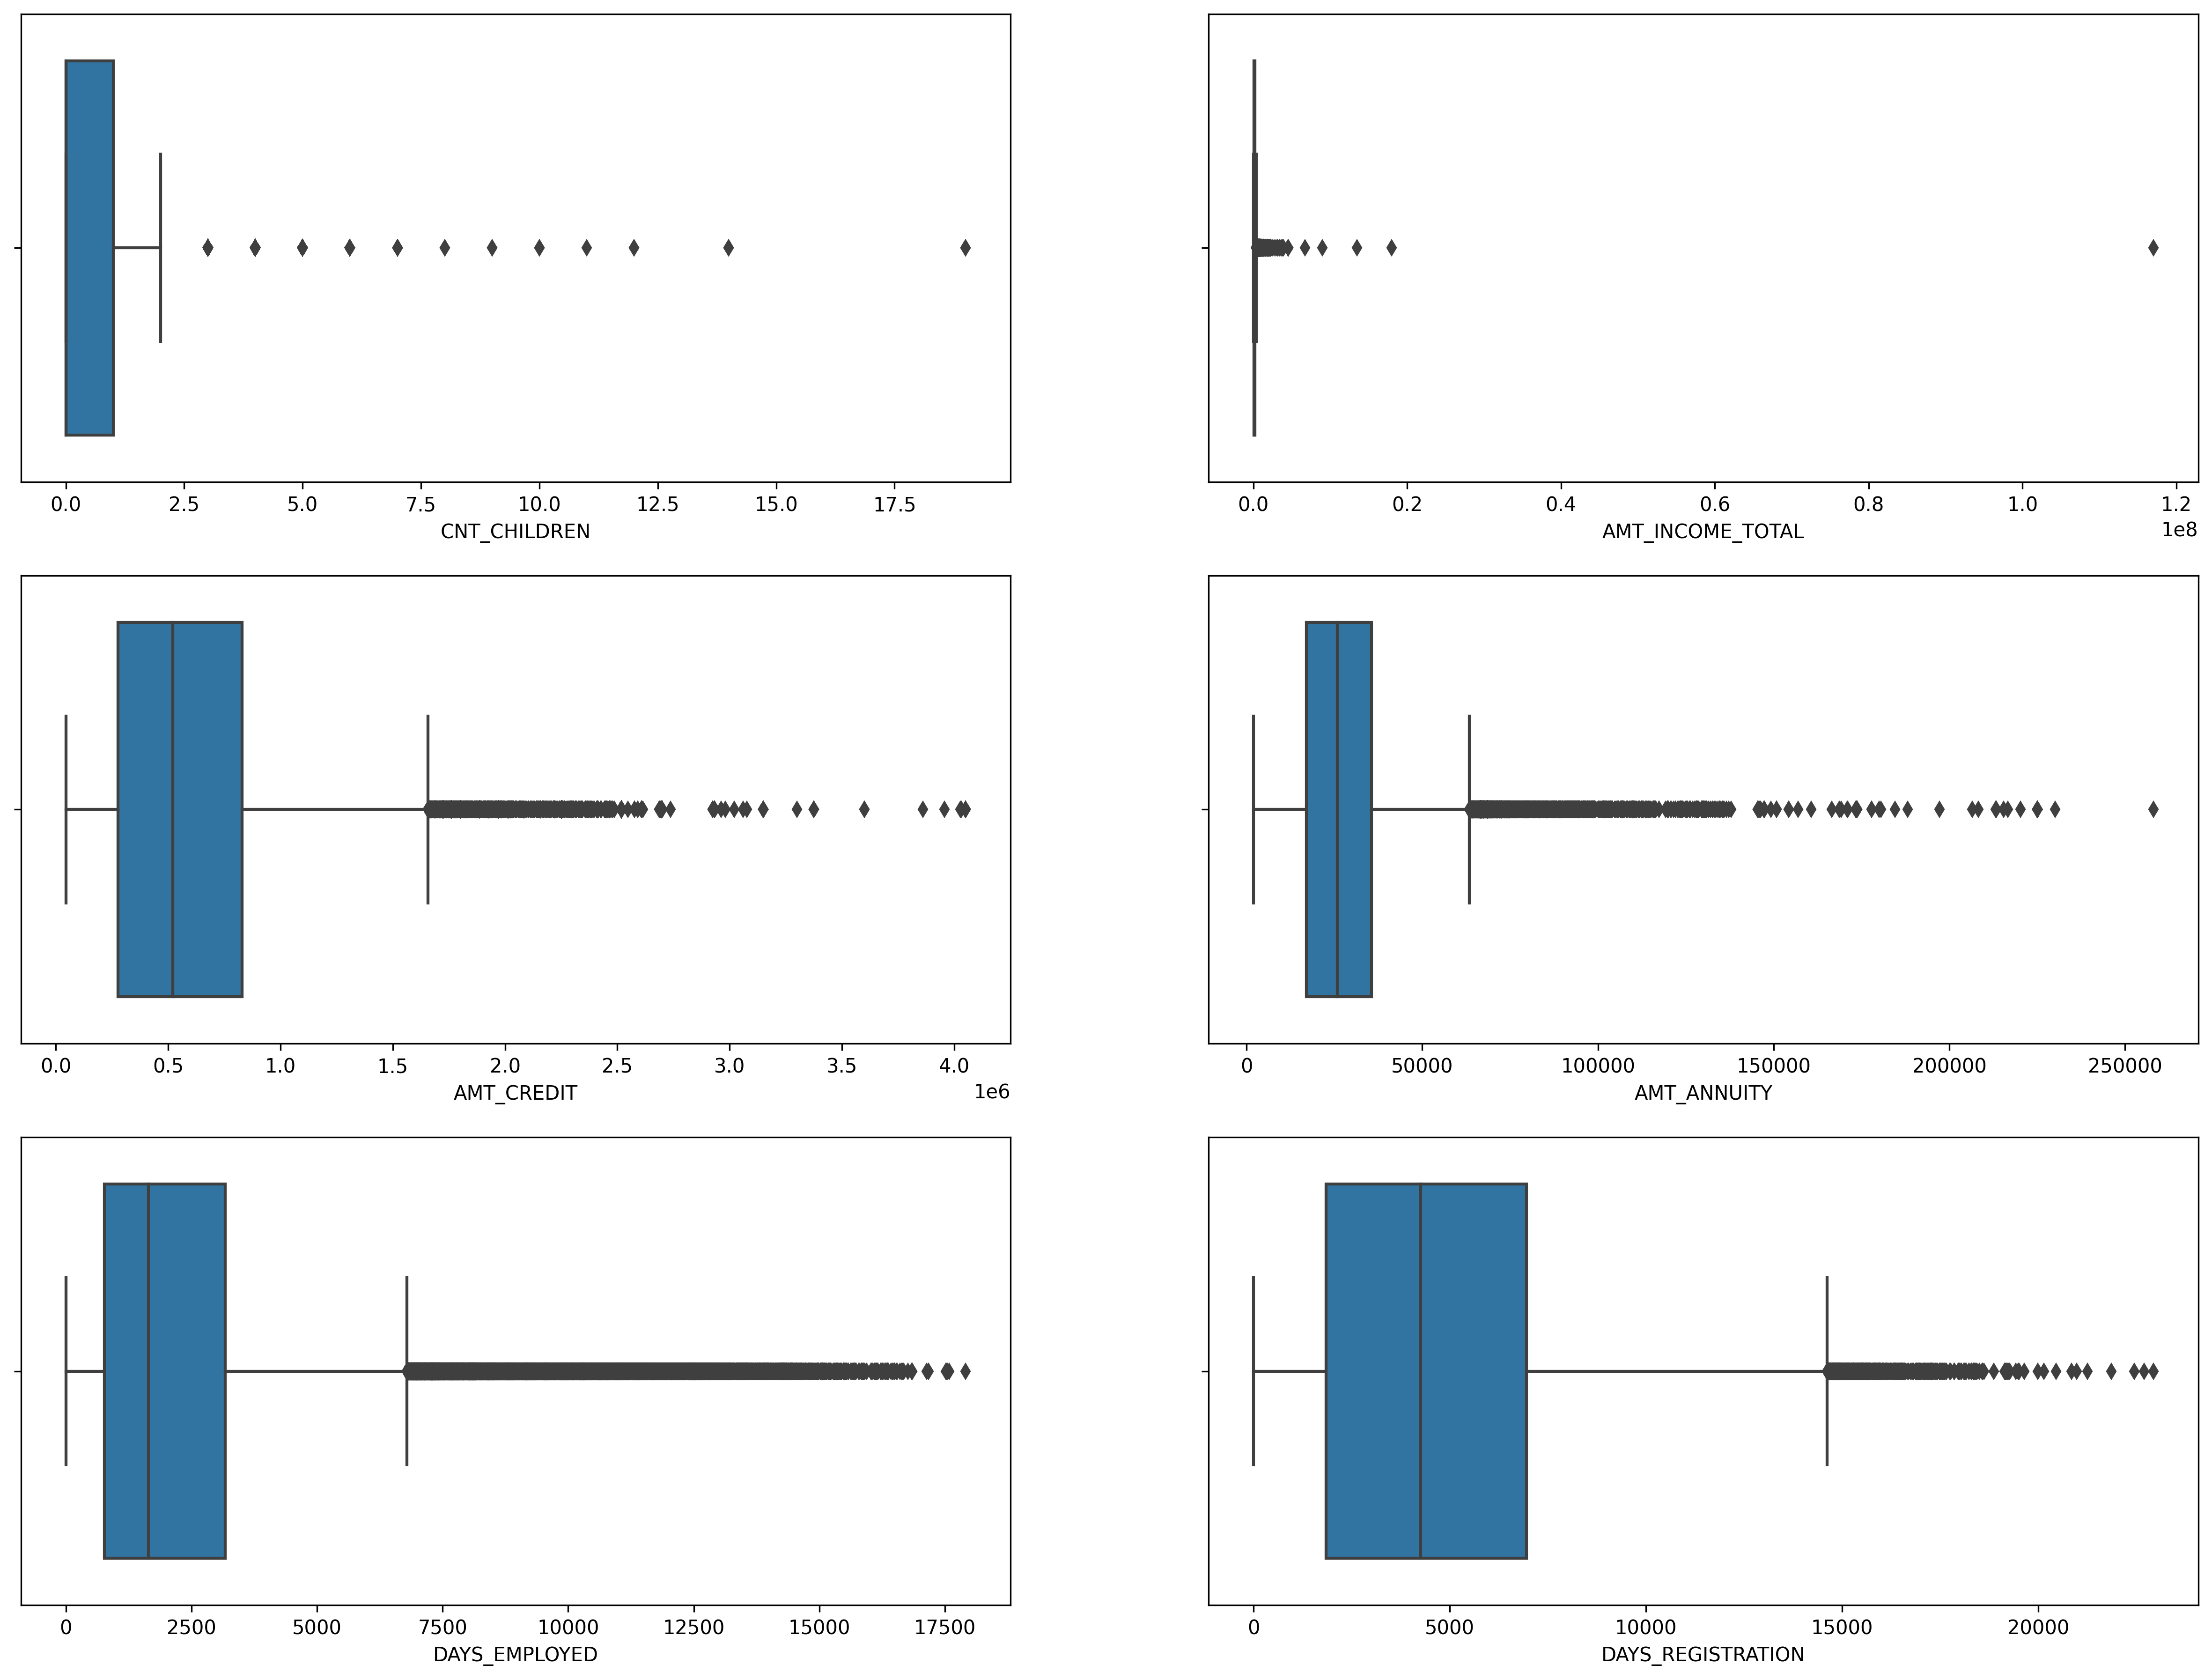

In [32]:
# Box plot for selected columns
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = loanapplicationdata)
plt.show()

From the above box plot and descibe analysis we found that following are the numeric columns are having outliers:
~~~~~~~~~
CNT_CHILDREN, AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED, DAYS_REGISTRATION
~~~~~~~~

* The first quartile almost missing for CNT_CHILDREN that means most of the data are present in the first quartile.

* There is single high value data point as outlier present in AMT_INCOME_TOTAL and Removal this point will dtrasticaly impact the box plot for further analysis.

* The first quartiles is slim compare to third quartile for AMT_CREDIT,AMT_ANNUITY, DAYS_EMPLOYED, DAYS_REGISTRATION. This mean data are skewed towards first quartile.

#### 2.f. Bin Creation

Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [33]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

loanapplicationdata['AMT_INCOME_RANGE']=pd.cut(loanapplicationdata['AMT_INCOME_TOTAL'],bins,labels=slot)

In [34]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']

loanapplicationdata['AMT_CREDIT_RANGE']=pd.cut(loanapplicationdata['AMT_CREDIT'],bins,labels=slot)

### 3. Analysis:

In [35]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=loanapplicationdata.loc[loanapplicationdata["TARGET"]==0]
target1_df=loanapplicationdata.loc[loanapplicationdata["TARGET"]==1]

In [36]:
# insights from number of target values

percentage_defaulters= round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)

percentage_nondefaulters=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)

print('Count of target0_df:', len(target0_df))
print('Count of target1_df:', len(target1_df))


print('Percentage of people who paid their loan are: ', percentage_nondefaulters, '%' )
print('Percentage of people who did not paid their loan are: ', percentage_defaulters, '%' )

Count of target0_df: 230298
Count of target1_df: 21835
Percentage of people who paid their loan are:  91.34 %
Percentage of people who did not paid their loan are:  8.66 %


In [37]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

imb_ratio = round(len(target0_df)/len(target1_df),2)

print('Imbalance Ratio:', imb_ratio)

Imbalance Ratio: 10.55


The Imbalance ratio is 11.48

#### 3.a Univariate analysis

Categorical Univariate Analysis in logarithmic scale for target=0 (client with no payment difficulties)

In [38]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titlepad'] = 14
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        
    plt.show()

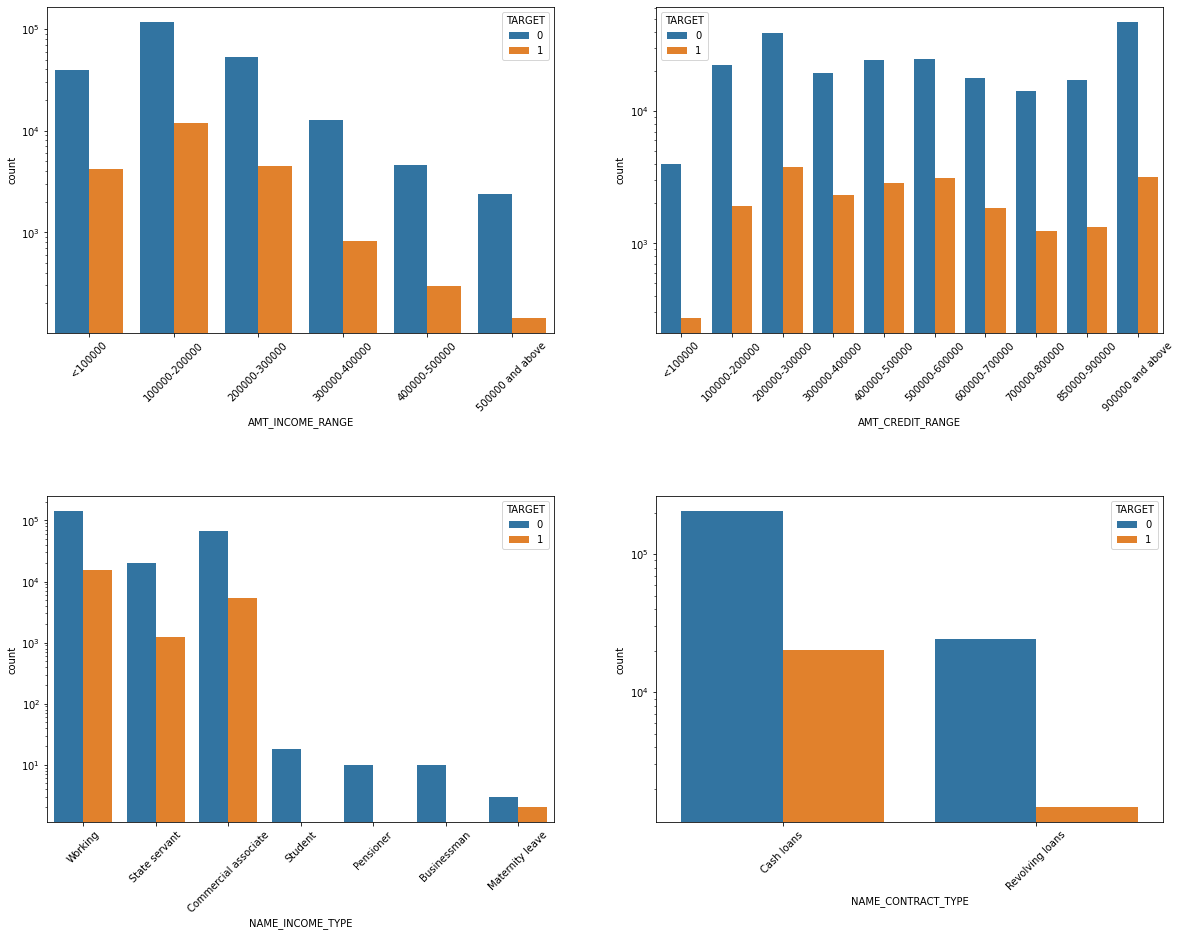

In [39]:
# Categoroical Univariate Analysis in logarithmic scale

features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = loanapplicationdata)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')
    

##### Insights:<br>

> AMT_INCOME_RANGE : 
    * The people having 100000-200000 are havign higher number of loan and also having higher in defaulter
    * The income segment having >500000 are having less defaulter.

> AMT_CREDIT_RANGE:
    * The people having <100000 loan are less defaulter.
    * income having more thatn >100000 are almost equal % of loan defaulter

> NAME_INCOME_TYPE:
    * Student pensioner and business have higher percentage of loan repayment.
    * Working, State servent and Commercial associates have higher default percentage.
    * Maternity category is significantly higher problem in replayement.

> NAME_CONTRACT_TYPE
    * For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
    * From the above graphs we can see that the Revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are comapritvely high.

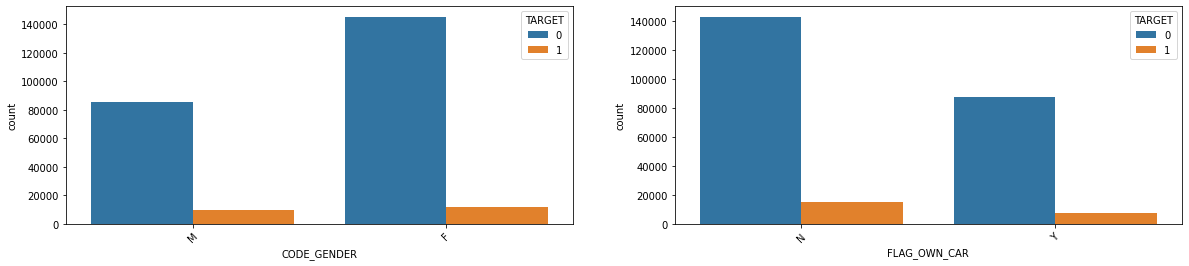

In [40]:
# Categoroical Univariate Analysis in Value scale

features = ['CODE_GENDER','FLAG_OWN_CAR']
plt.figure(figsize = (20, 10))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = loanapplicationdata)
     
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45)
#     plt.yscale('log')

##### Insights: 
> CODE_GENDER:
    * The % of defaulters are more in Male than Female


> FLAG_OWN_CAR:
    * The person owning car is having higher percentage of defaulter.


#### Univariate analysis Continuious variables:

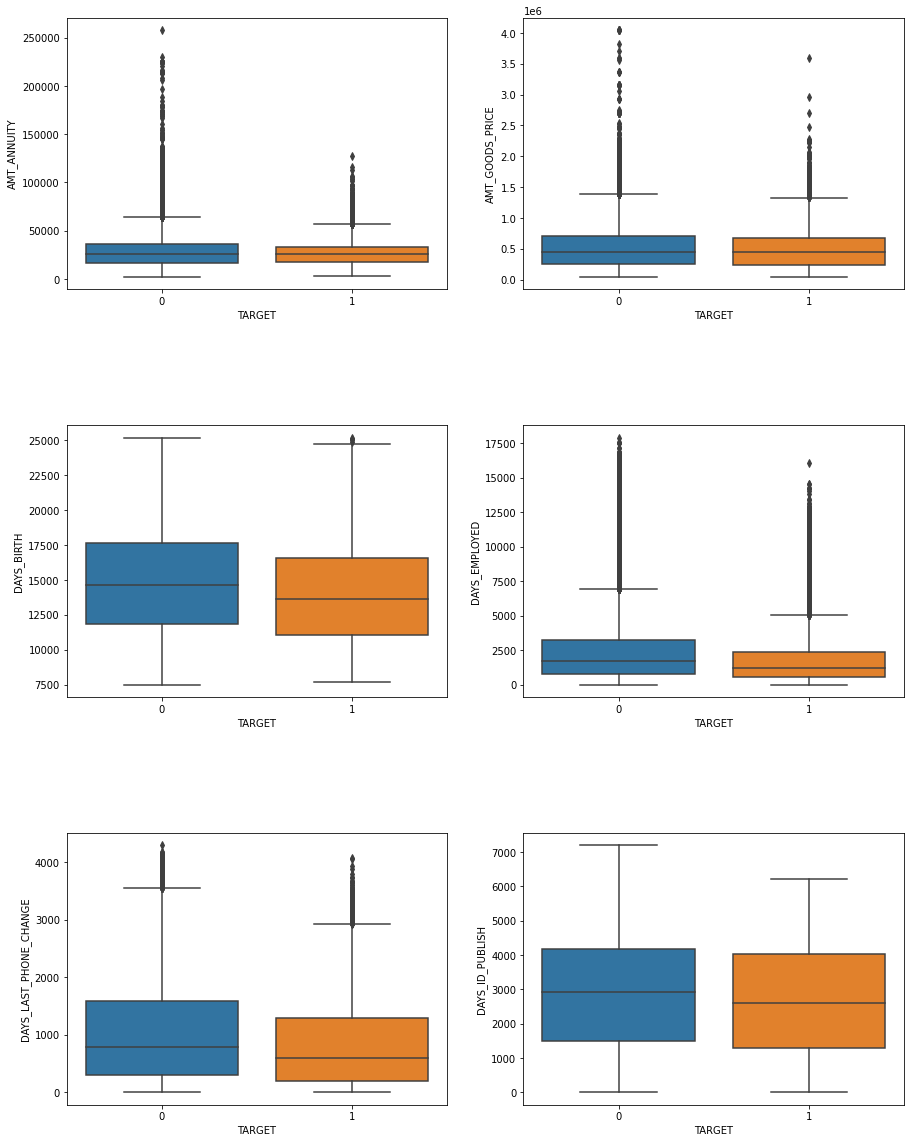

In [41]:
# Univariate Analysis for continous variable

features = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
plt.figure(figsize = (15, 20))

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data = loanapplicationdata)
    

Inference:
* Days_Birth: The people having higher age are having higher probability of repayment.
* Some outliers are observed in In 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', DAYS_LAST_PHONE_CHANGE in the dataset.
* Less outlier observed in Days_Birth and DAYS_ID_PUBLISH
* 1st quartile is smaller than third quartile in In 'AMT_ANNUITY','AMT_GOODS_PRICE', DAYS_LAST_PHONE_CHANGE.
* In DAYS_ID_PUBLISH: people changing ID in recent days are relativelty prone to be default.
* There is single high value data point as outlier present in DAYS_EMPLOYED. Removal this point will drastically impact the box plot for further analysis. 

#### 3.b. Bivariate analysis for numerical variables

**For Target 0**

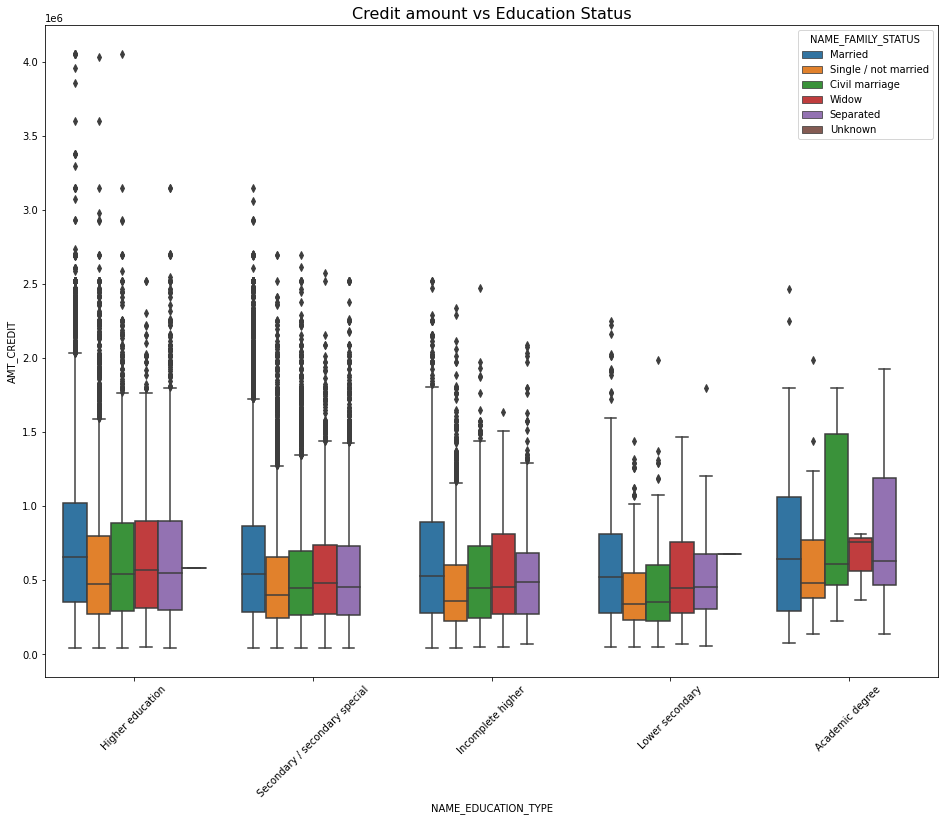

In [42]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

* Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
* Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

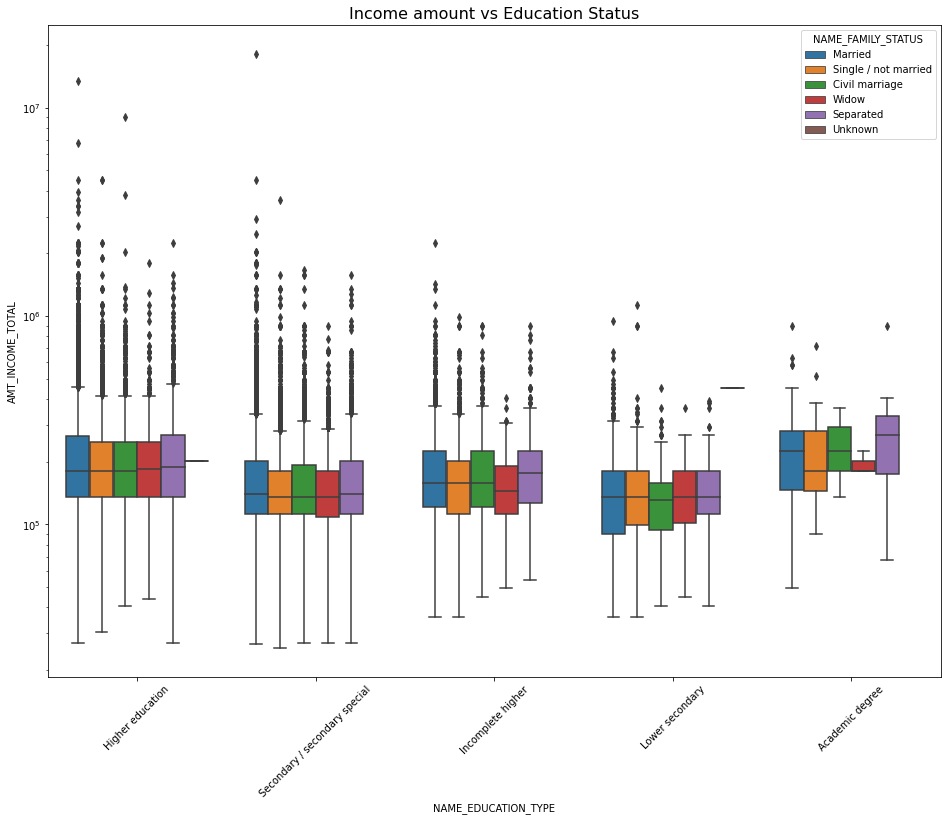

In [43]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

* In Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. 
* Less outlier are having for Academic degree but there income amount is little higher that Higher education. 
* Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

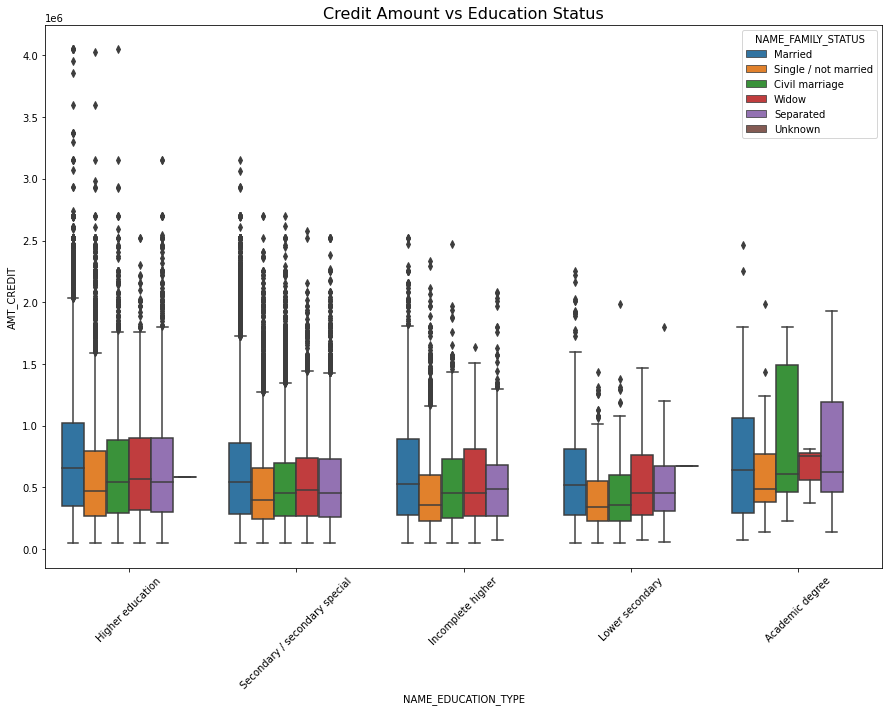

In [44]:
# Box plotting for credit amount

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

* Observations are Quite similar with Target 0 
* Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
* Most of the outliers are from Education type 'Higher education' and 'Secondary'. 
* Civil marriage for Academic degree is having most of the credits in the third quartile.

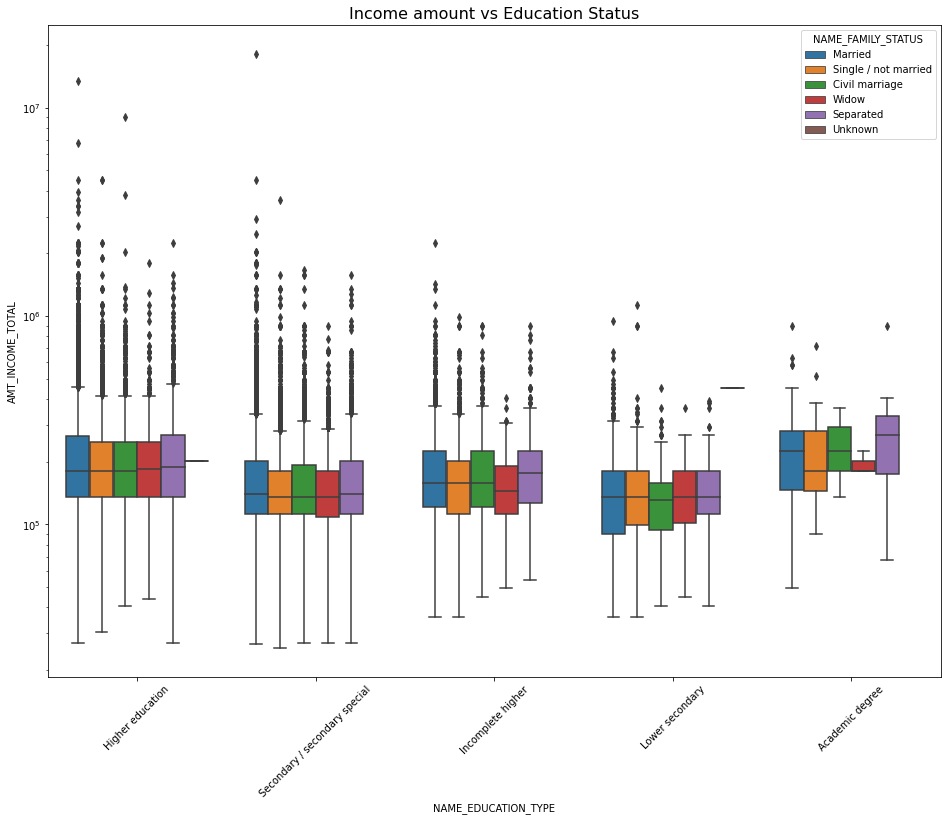

In [45]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

* There is also have some similarity with Target0, 
* Education type 'Higher education' the income amount is mostly equal with family status. 
* Less outlier are having for Academic degree but there income amount is little higher that Higher education. 
* Lower secondary are have less income amount than others.

### 3.c. Correlation:

Getting top 10 correlation between variables

In [46]:
# Top 10 correlated variables: target 0 dataaframe

corr = target0_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
649     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       1.0000
184              AMT_GOODS_PRICE                  AMT_CREDIT       0.9900
464  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION       0.8600
680     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.8600
557      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY       0.8200
185              AMT_GOODS_PRICE                 AMT_ANNUITY       0.7700
154                  AMT_ANNUITY                  AMT_CREDIT       0.7600
433   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION       0.4600
526       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY       0.4400
153                  AMT_ANNUITY            AMT_INCOME_TOTAL       0.4000

In [47]:
# Top 10 correlated variables: target 1 dataaframe

corr = target1_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
649     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       1.0000
184              AMT_GOODS_PRICE                  AMT_CREDIT       0.9800
680     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.8700
464  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION       0.8500
557      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY       0.7700
185              AMT_GOODS_PRICE                 AMT_ANNUITY       0.7500
154                  AMT_ANNUITY                  AMT_CREDIT       0.7500
433   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION       0.5100
526       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY       0.4800
619     DEF_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.3300


* From the above correlation analysis it is infered that the highest corelation (1.0) is between (OBS_60_CNT_SOCIAL_CIRCLE with OBS_30_CNT_SOCIAL_CIRCLE) and (FLOORSMAX_MEDI with FLOORSMAX_AVG) which is same for both the data set.

### 4. Read Previous Application data and merging with application data

In [48]:
# Reading the dataset of previous application

previousdata=pd.read_csv('previous_application.csv')

In [49]:
#explore the dataset
previousdata.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [50]:
# get shape of data (rows, columns)
previousdata.shape

(1670214, 37)

In [51]:
# get the type of dataset
previousdata.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [52]:
# displaying the informtion of previous application dataset
previousdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [53]:
# Describing the previous application dataset
previousdata.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1670214.0000 1670214.0000 1297979.0000     1670214.0000 1670213.0000   
mean  1923089.1353  278357.1741   15955.1207      175233.8604  196114.0212   
std    532597.9587  102814.8238   14782.1373      292779.7624  318574.6165   
min   1000001.0000  100001.0000       0.0000           0.0000       0.0000   
25%   1461857.2500  189329.0000    6321.7800       18720.0000   24160.5000   
50%   1923110.5000  278714.5000   11250.0000       71046.0000   80541.0000   
75%   2384279.7500  367514.0000   20658.4200      180360.0000  216418.5000   
max   2845382.0000  456255.0000  418058.1450     6905160.0000 6905160.0000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count       774370.0000     1284699.0000             1670214.0000   
mean          6697.4021      227847.2793                  12.4842   
std          20921.4954      315396.5579                   3.3340   
min             -0.9000           0.0000                   0.0000   
25%              0.0000       50841.0000                  10.0000   
50%           1638.0000      112320.0000                  12.0000   
75%           7740.0000      234000.0000                  15.0000   
max        3060045.0000     6905160.0000                  23.0000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1670214.0000        774370.0000              5951.0000   
mean                   0.9965             0.0796                 0.1884   
std                    0.0593             0.1078                 0.0877   
min                    0.0000            -0.0000                 0.0348   
25%                    1.0000             0.0000                 0.1607   
50%                    1.0000             0.0516                 0.1891   
75%                    1.0000             0.1089                 0.1933   
max                    1.0000             1.0000                 1.0000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                 5951.0000   1670214.0000      1670214.0000 1297984.0000   
mean                     0.7735      -880.6797          313.9511      16.0541   
std                      0.1009       779.0997         7127.4435      14.5673   
min                      0.3732     -2922.0000           -1.0000       0.0000   
25%                      0.7156     -1300.0000           -1.0000       6.0000   
50%                      0.8351      -581.0000            3.0000      12.0000   
75%                      0.8525      -280.0000           82.0000      24.0000   
max                      1.0000        -1.0000      4000000.0000      84.0000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count         997149.0000     997149.0000                997149.0000   
mean          342209.8550      13826.2693                 33767.7741   
std            88916.1158      72444.8697                106857.0348   
min            -2922.0000      -2892.0000                 -2801.0000   
25%           365243.0000      -1628.0000                 -1242.0000   
50%           365243.0000       -831.0000                  -361.0000   
75%           365243.0000       -411.0000                   129.0000   
max           365243.0000     365243.0000                365243.0000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count    997149.0000       997149.0000                997149.0000  
mean      76582.4031        81992.3438                     0.3326  
std      149647.4151       153303.5167                     0.4711  
min       -2889.0000        -2874.0000                     0.0000  
25%       -1314.0000        -1270.0000                     0.0000  
50%        -537.0000         -499.0000                     0.0000  
75%         -74.0000          -44.0000                     1.0000  
max      365243.0000       365243.0000                     1.0000

In [54]:
# Finding percentage of null values columns
NA_col_precentage = column_wise_null_percentage(previousdata)

In [55]:
# identify columns only with null values
NA_col_precentage = NA_col_precentage[NA_col_precentage>0]
NA_col_precentage

AMT_ANNUITY                 22.2900
AMT_DOWN_PAYMENT            53.6400
AMT_GOODS_PRICE             23.0800
RATE_DOWN_PAYMENT           53.6400
RATE_INTEREST_PRIMARY       99.6400
RATE_INTEREST_PRIVILEGED    99.6400
NAME_TYPE_SUITE             49.1200
CNT_PAYMENT                 22.2900
PRODUCT_COMBINATION          0.0200
DAYS_FIRST_DRAWING          40.3000
DAYS_FIRST_DUE              40.3000
DAYS_LAST_DUE_1ST_VERSION   40.3000
DAYS_LAST_DUE               40.3000
DAYS_TERMINATION            40.3000
NFLAG_INSURED_ON_APPROVAL   40.3000
dtype: float64

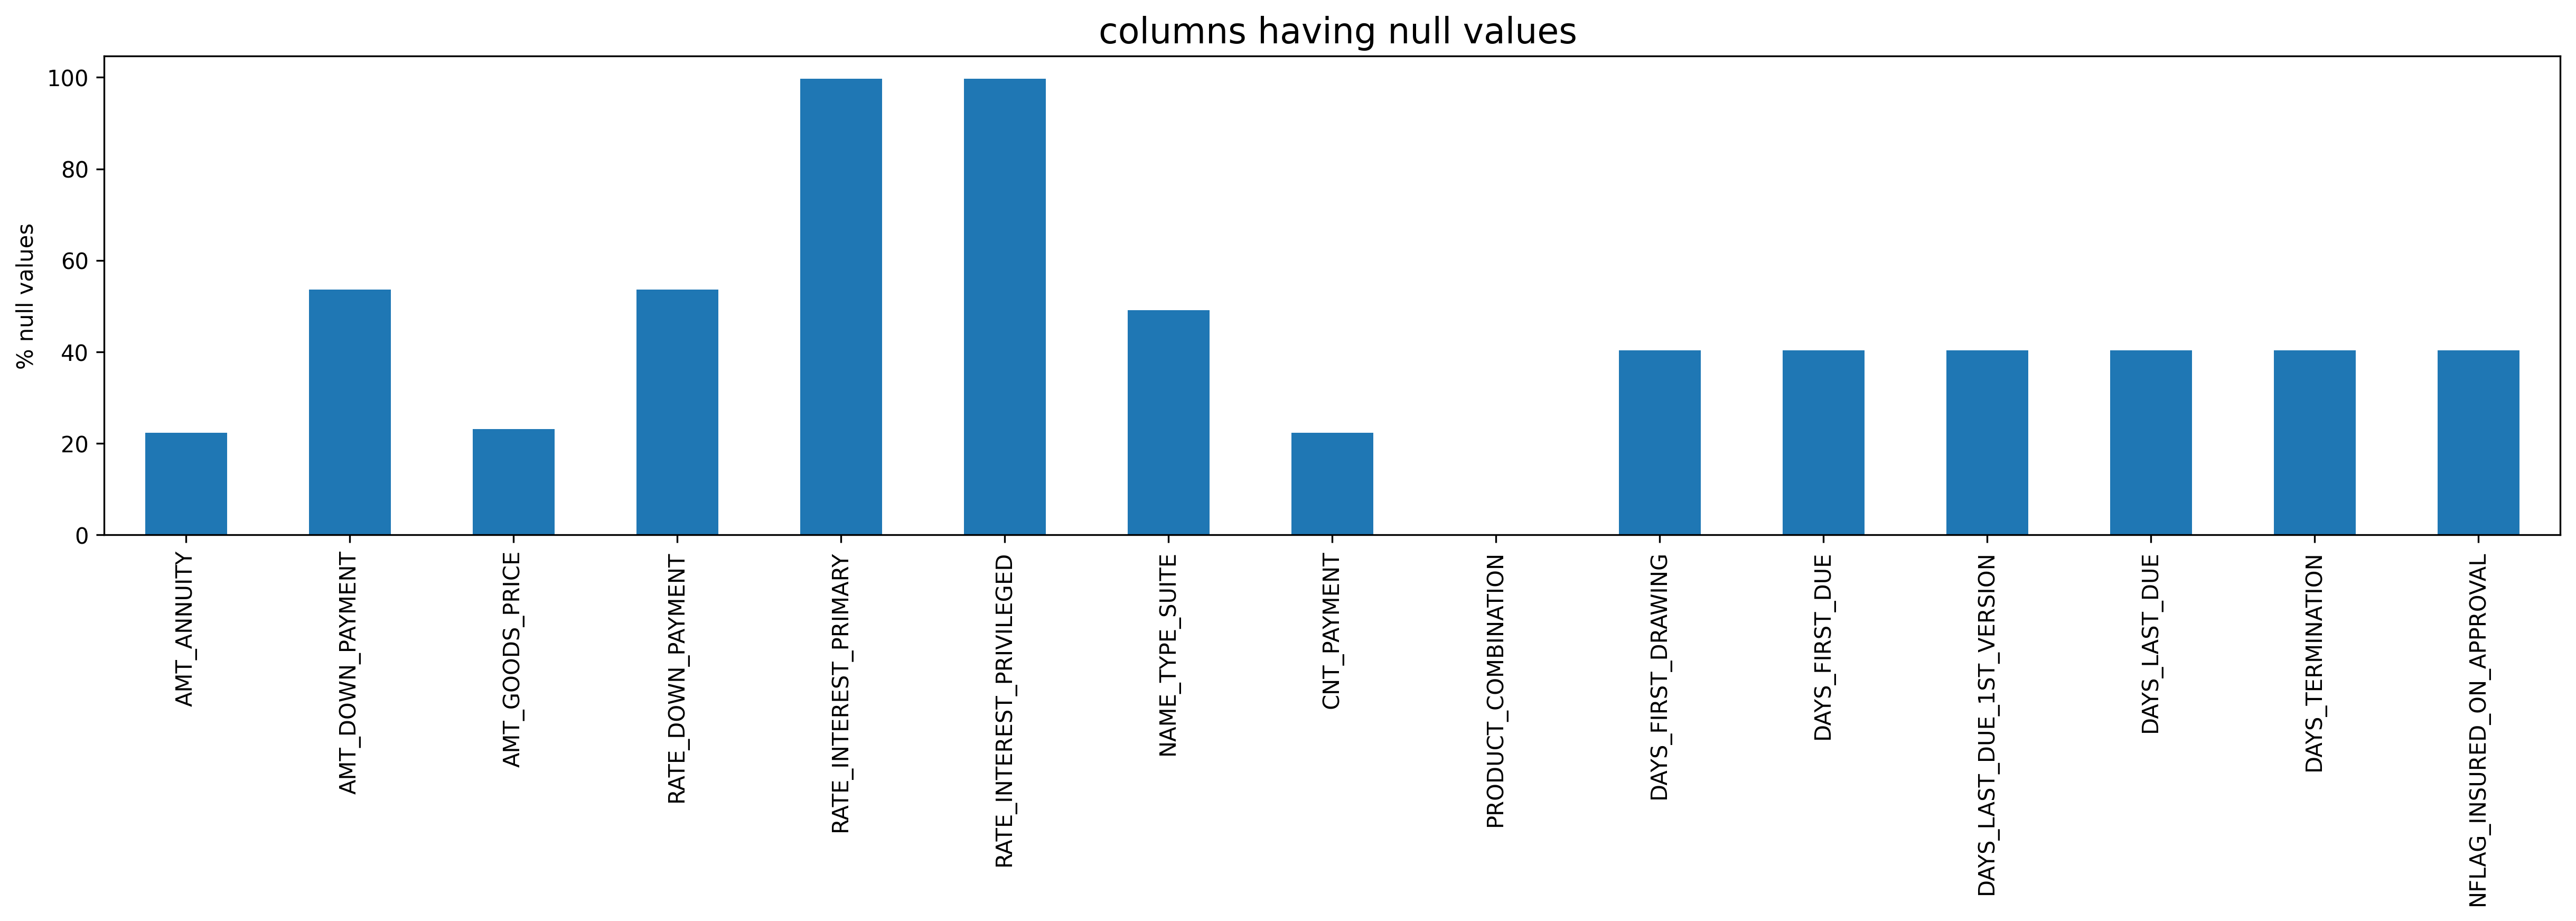

In [56]:
# grafical representation of columns having % null values
plt.figure(figsize= (20,4),dpi=300)
NA_col_precentage.plot(kind = 'bar')
plt.title (' columns having null values')
plt.ylabel('% null values')
plt.show()

In [57]:
# Get the column with null values more than 50%
NA_col_precentage = NA_col_precentage[NA_col_precentage>50]
print("Number of columns having null value more than 50% :", len(NA_col_precentage.index))
print(NA_col_precentage)

Number of columns having null value more than 50% : 4
AMT_DOWN_PAYMENT           53.6400
RATE_DOWN_PAYMENT          53.6400
RATE_INTEREST_PRIMARY      99.6400
RATE_INTEREST_PRIVILEGED   99.6400
dtype: float64


* Droped all columns from Dataframe for which missing value percentage are more than 50%.
``````    
    'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'
``````

In [58]:
# removed 4 columns having null percentage more than 50%.
previousdata = previousdata.drop(NA_col_precentage.index, axis =1)
previousdata.shape

(1670214, 33)

In [59]:
# Merging the Application dataset with previous appliaction dataset

df_comb = pd.merge(left=loanapplicationdata,right=previousdata,how='inner',on='SK_ID_CURR',suffixes='_x')
df_comb.shape

(1140063, 76)

In [60]:
df_comb.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100002       1          Cash loans           M            N   
1      100003       0          Cash loans           F            N   
2      100003       0          Cash loans           F            N   
3      100003       0          Cash loans           F            N   
4      100004       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0       202500.0000  406597.5000    24700.5000   
1               N             0       270000.0000 1293502.5000    35698.5000   
2               N             0       270000.0000 1293502.5000    35698.5000   
3               N             0       270000.0000 1293502.5000    35698.5000   
4               Y             0        67500.0000  135000.0000     6750.0000   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE_ NAME_INCOME_TYPE  \
0       351000.0000    Unaccompanied          Working   
1      1129500.0000           Family    State servant   
2      1129500.0000           Family    State servant   
3      1129500.0000           Family    State servant   
4       135000.0000    Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188        9461            637          3648.0000   
1                      0.0035       16765           1188          1186.0000   
2                      0.0035       16765           1188          1186.0000   
3                      0.0035       16765           1188          1186.0000   
4                      0.0100       19046            225          4260.0000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START_  \
0             2120        Laborers                   WEDNESDAY   
1              291      Core staff                      MONDAY   
2              291      Core staff                      MONDAY   
3              291      Core staff                      MONDAY   
4             2531        Laborers                      MONDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
1                        11                           0   
2                        11                           0   
3                        11                           0   
4                         9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                    2.0000                    2.0000   
1                  School                    1.0000             

In [61]:
# Renaming the column names after merging from combined df

df_comb = df_comb.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [62]:
# Removing unwanted columns from cmbined df for analysis

df_comb.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

** Performing univariate analysis**

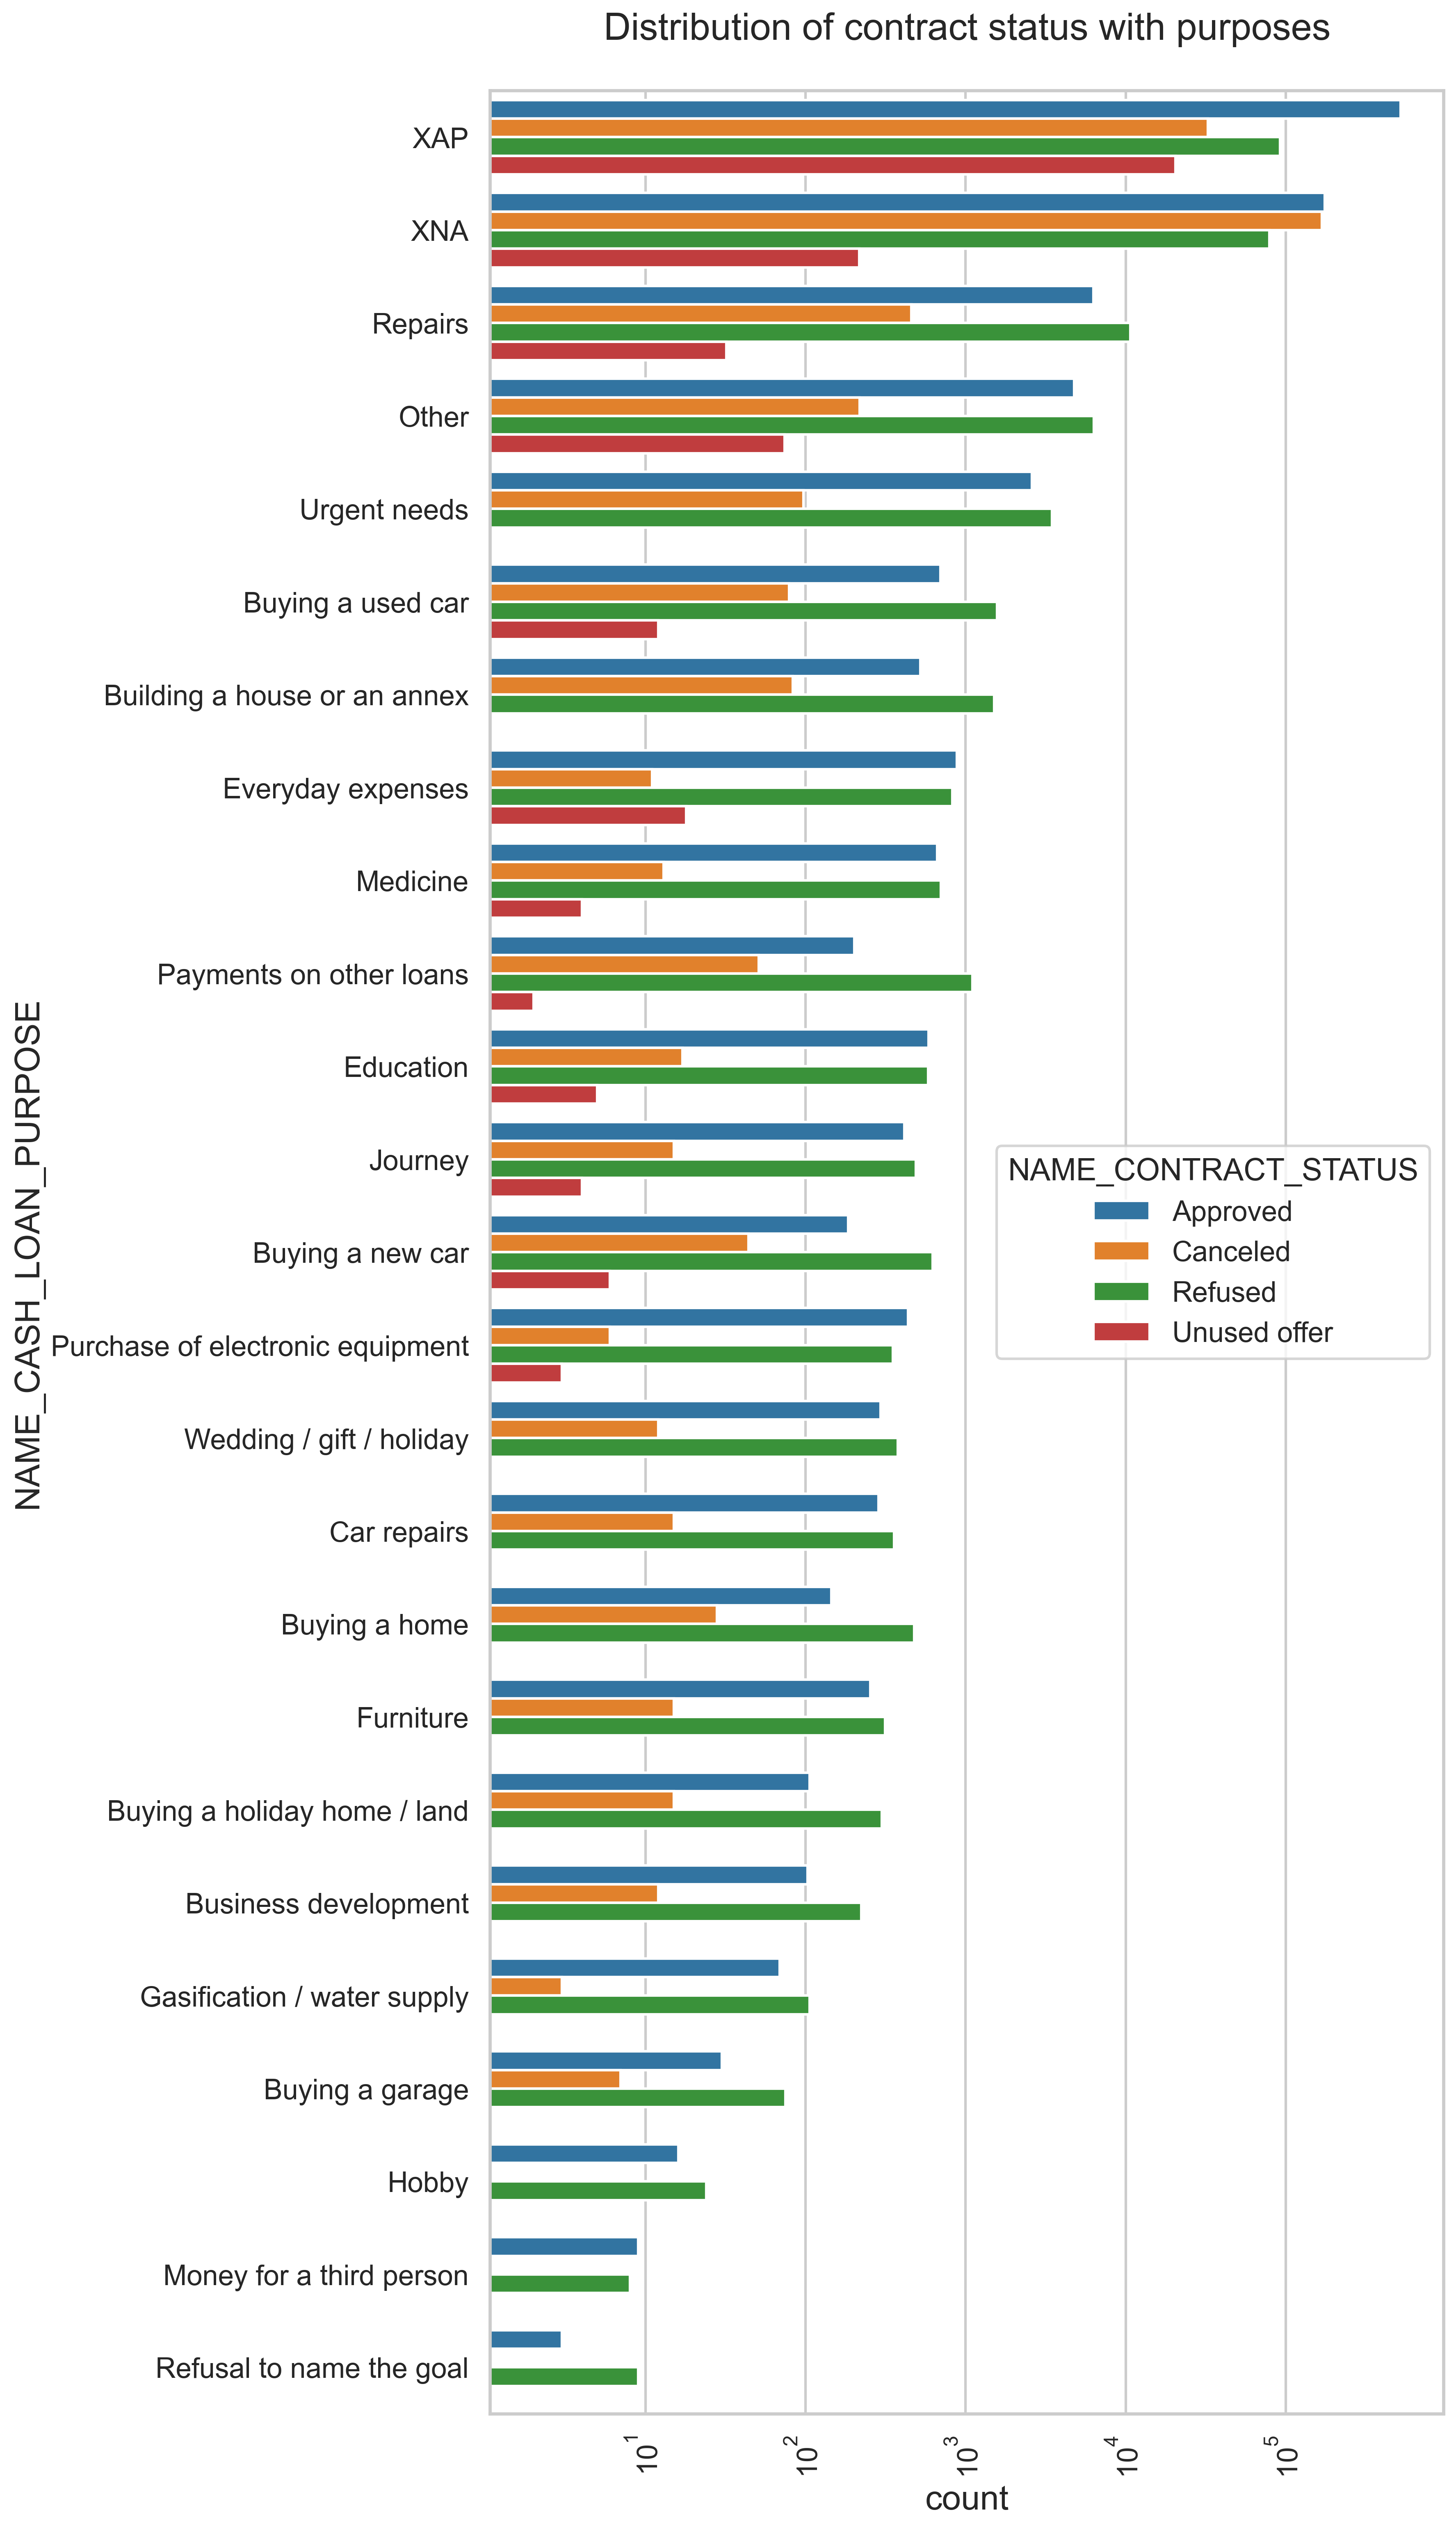

In [63]:
# Distribution of contract status in logarithmic scale
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = df_comb, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comb['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.
For education purposes we have equal number of approves and rejection
Payign other loans and buying a new car is having significant higher rejection than approves.

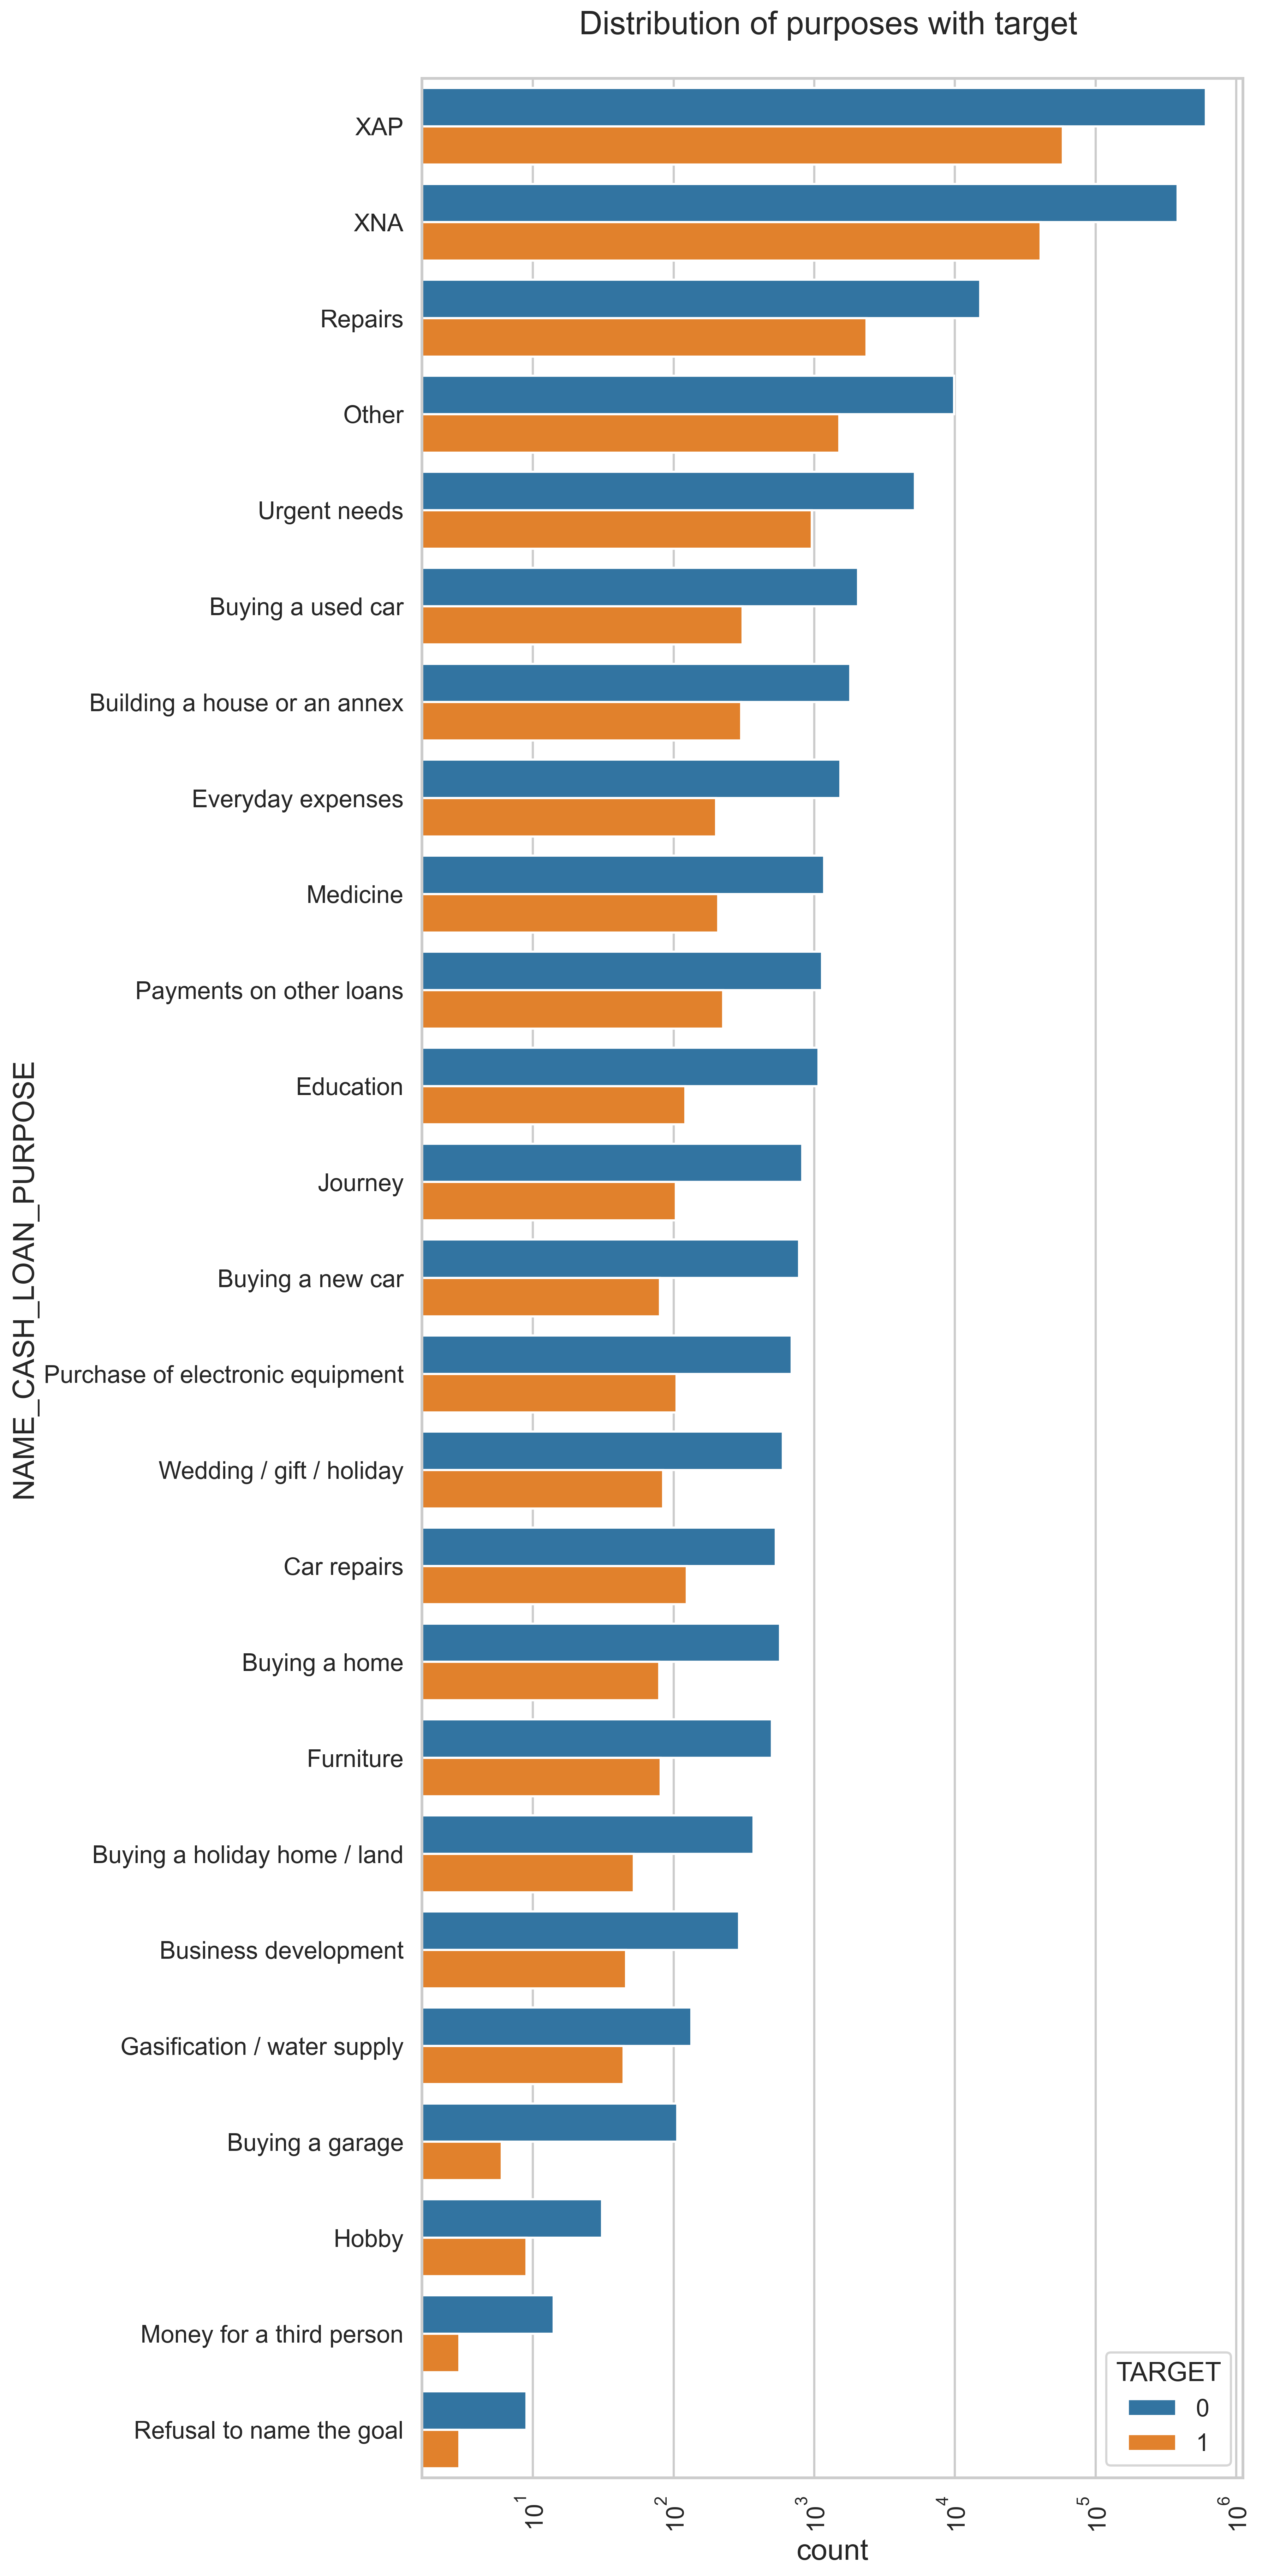

In [64]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,30),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = df_comb, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comb['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

Few points we can conclude from abpve plot:

Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

**Bivariate analysis**

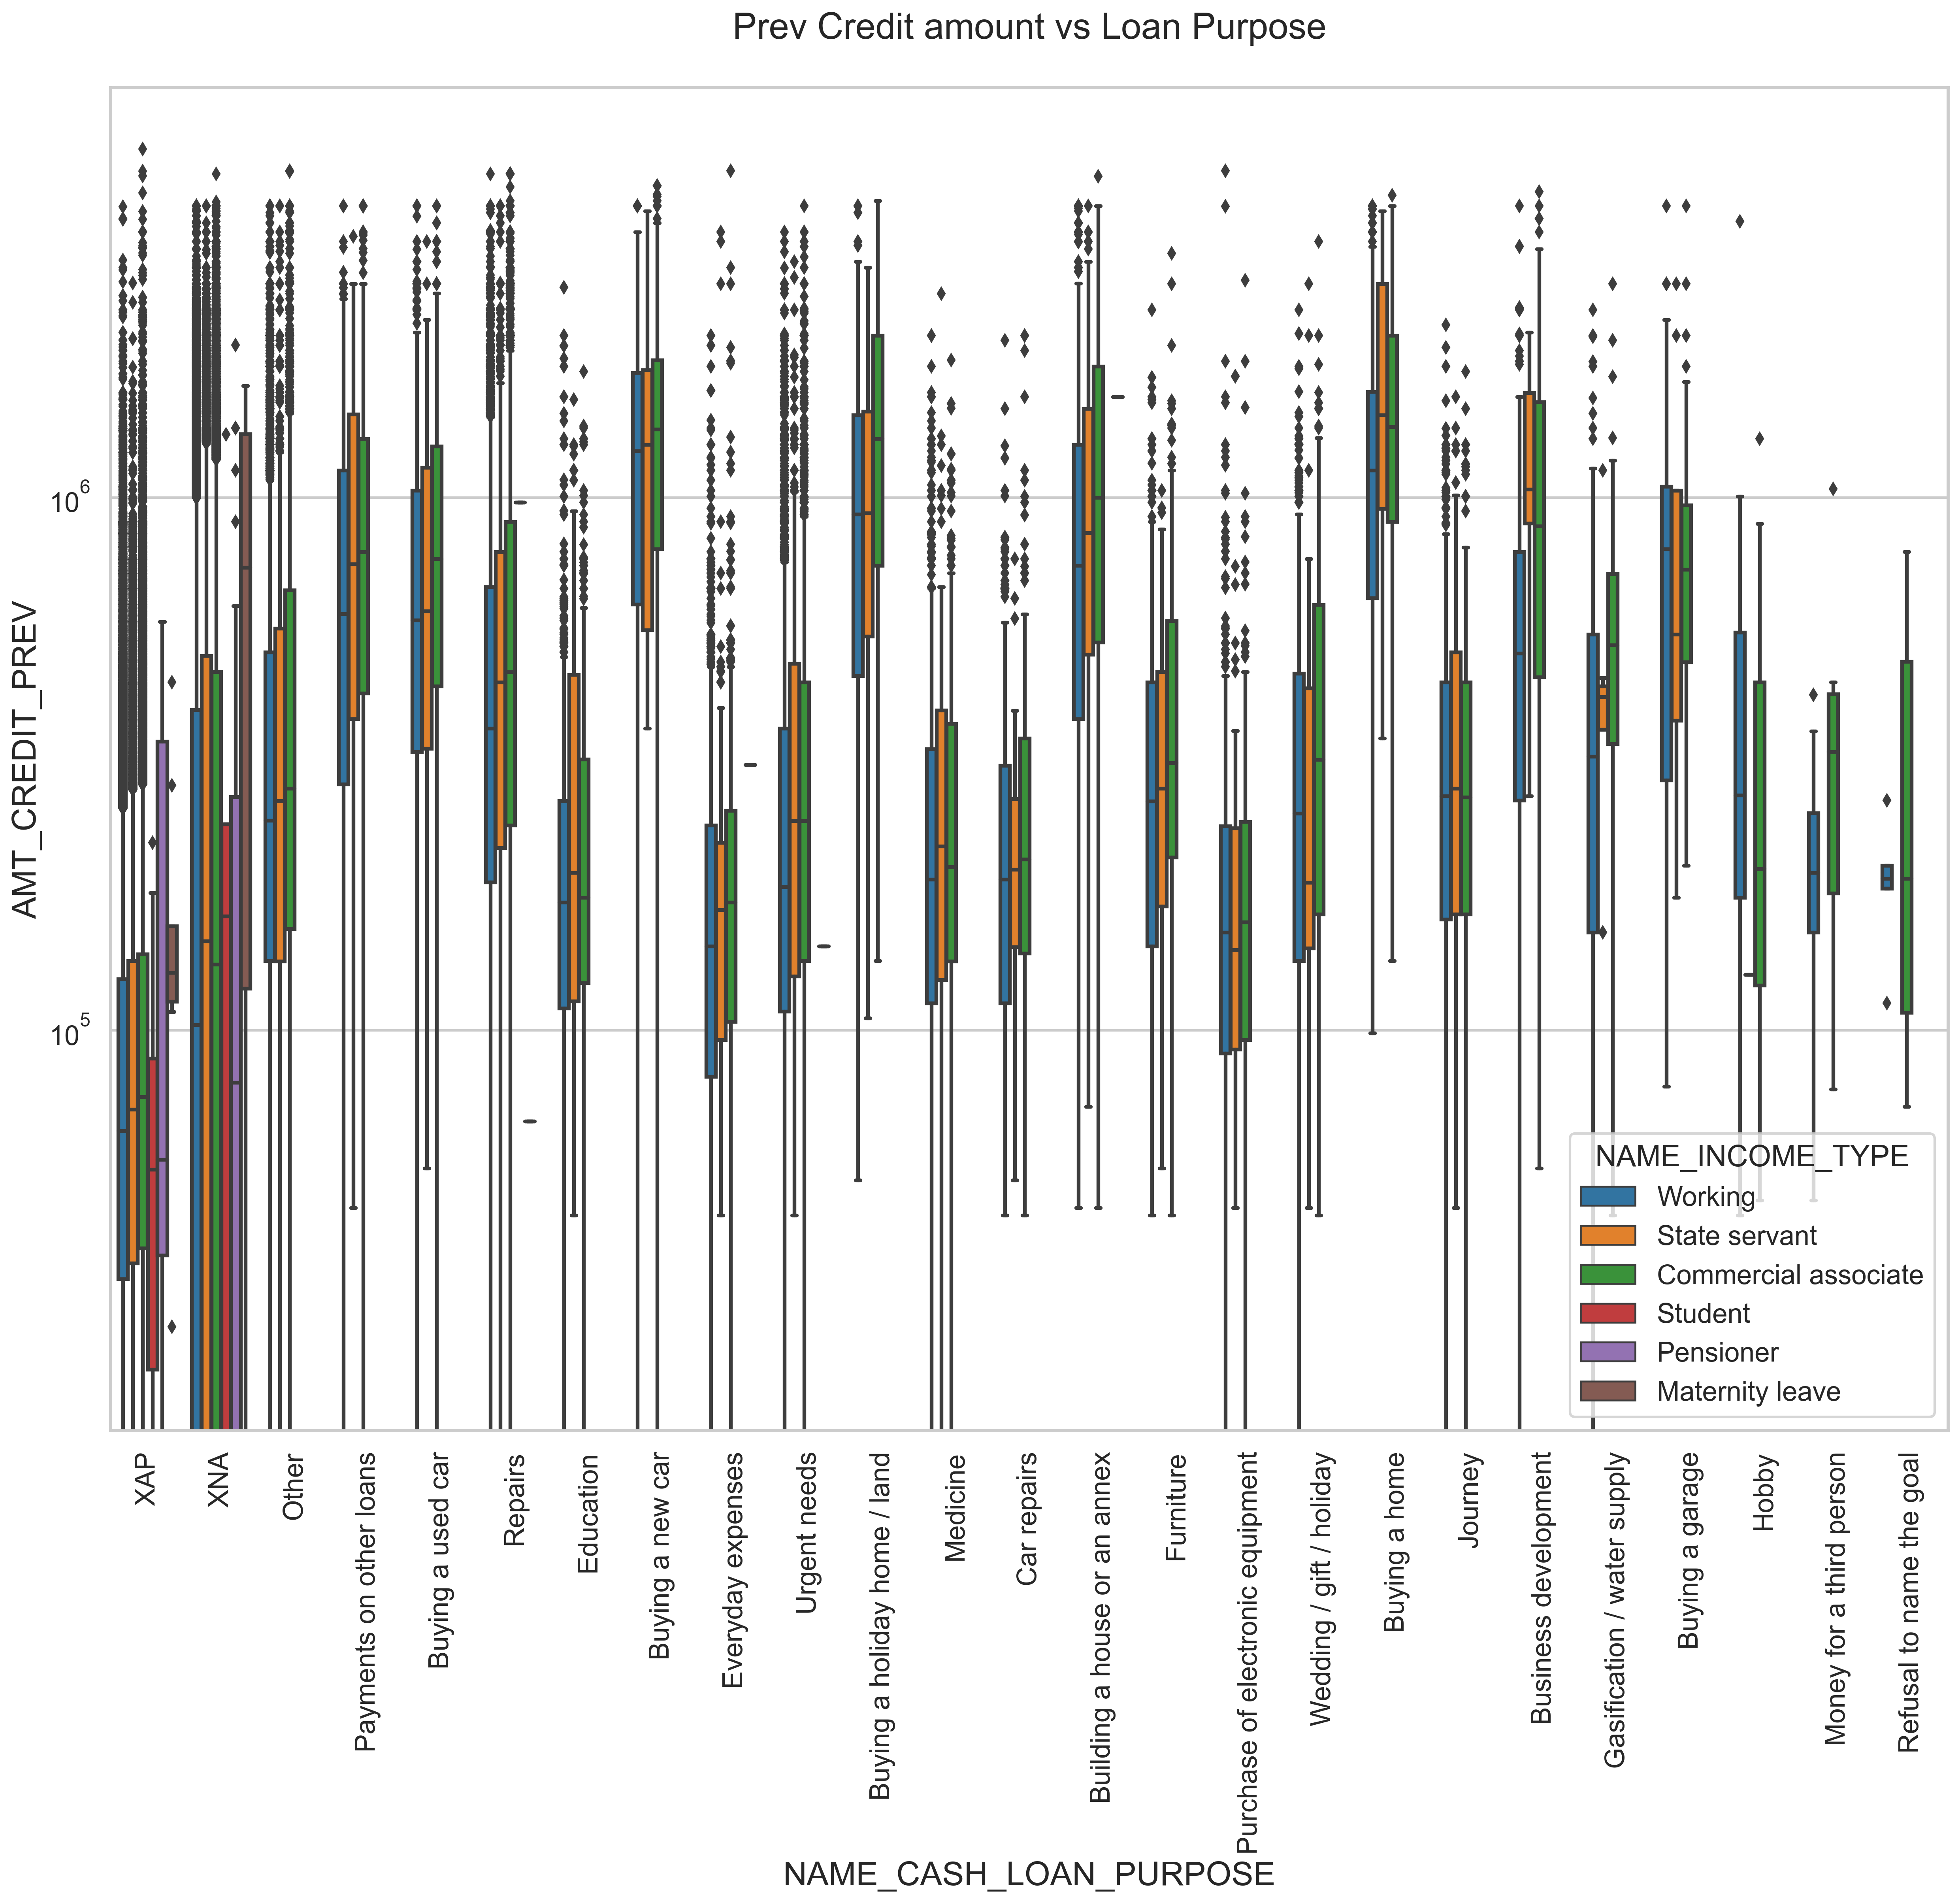

In [65]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,15),dpi = 300)
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =df_comb, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

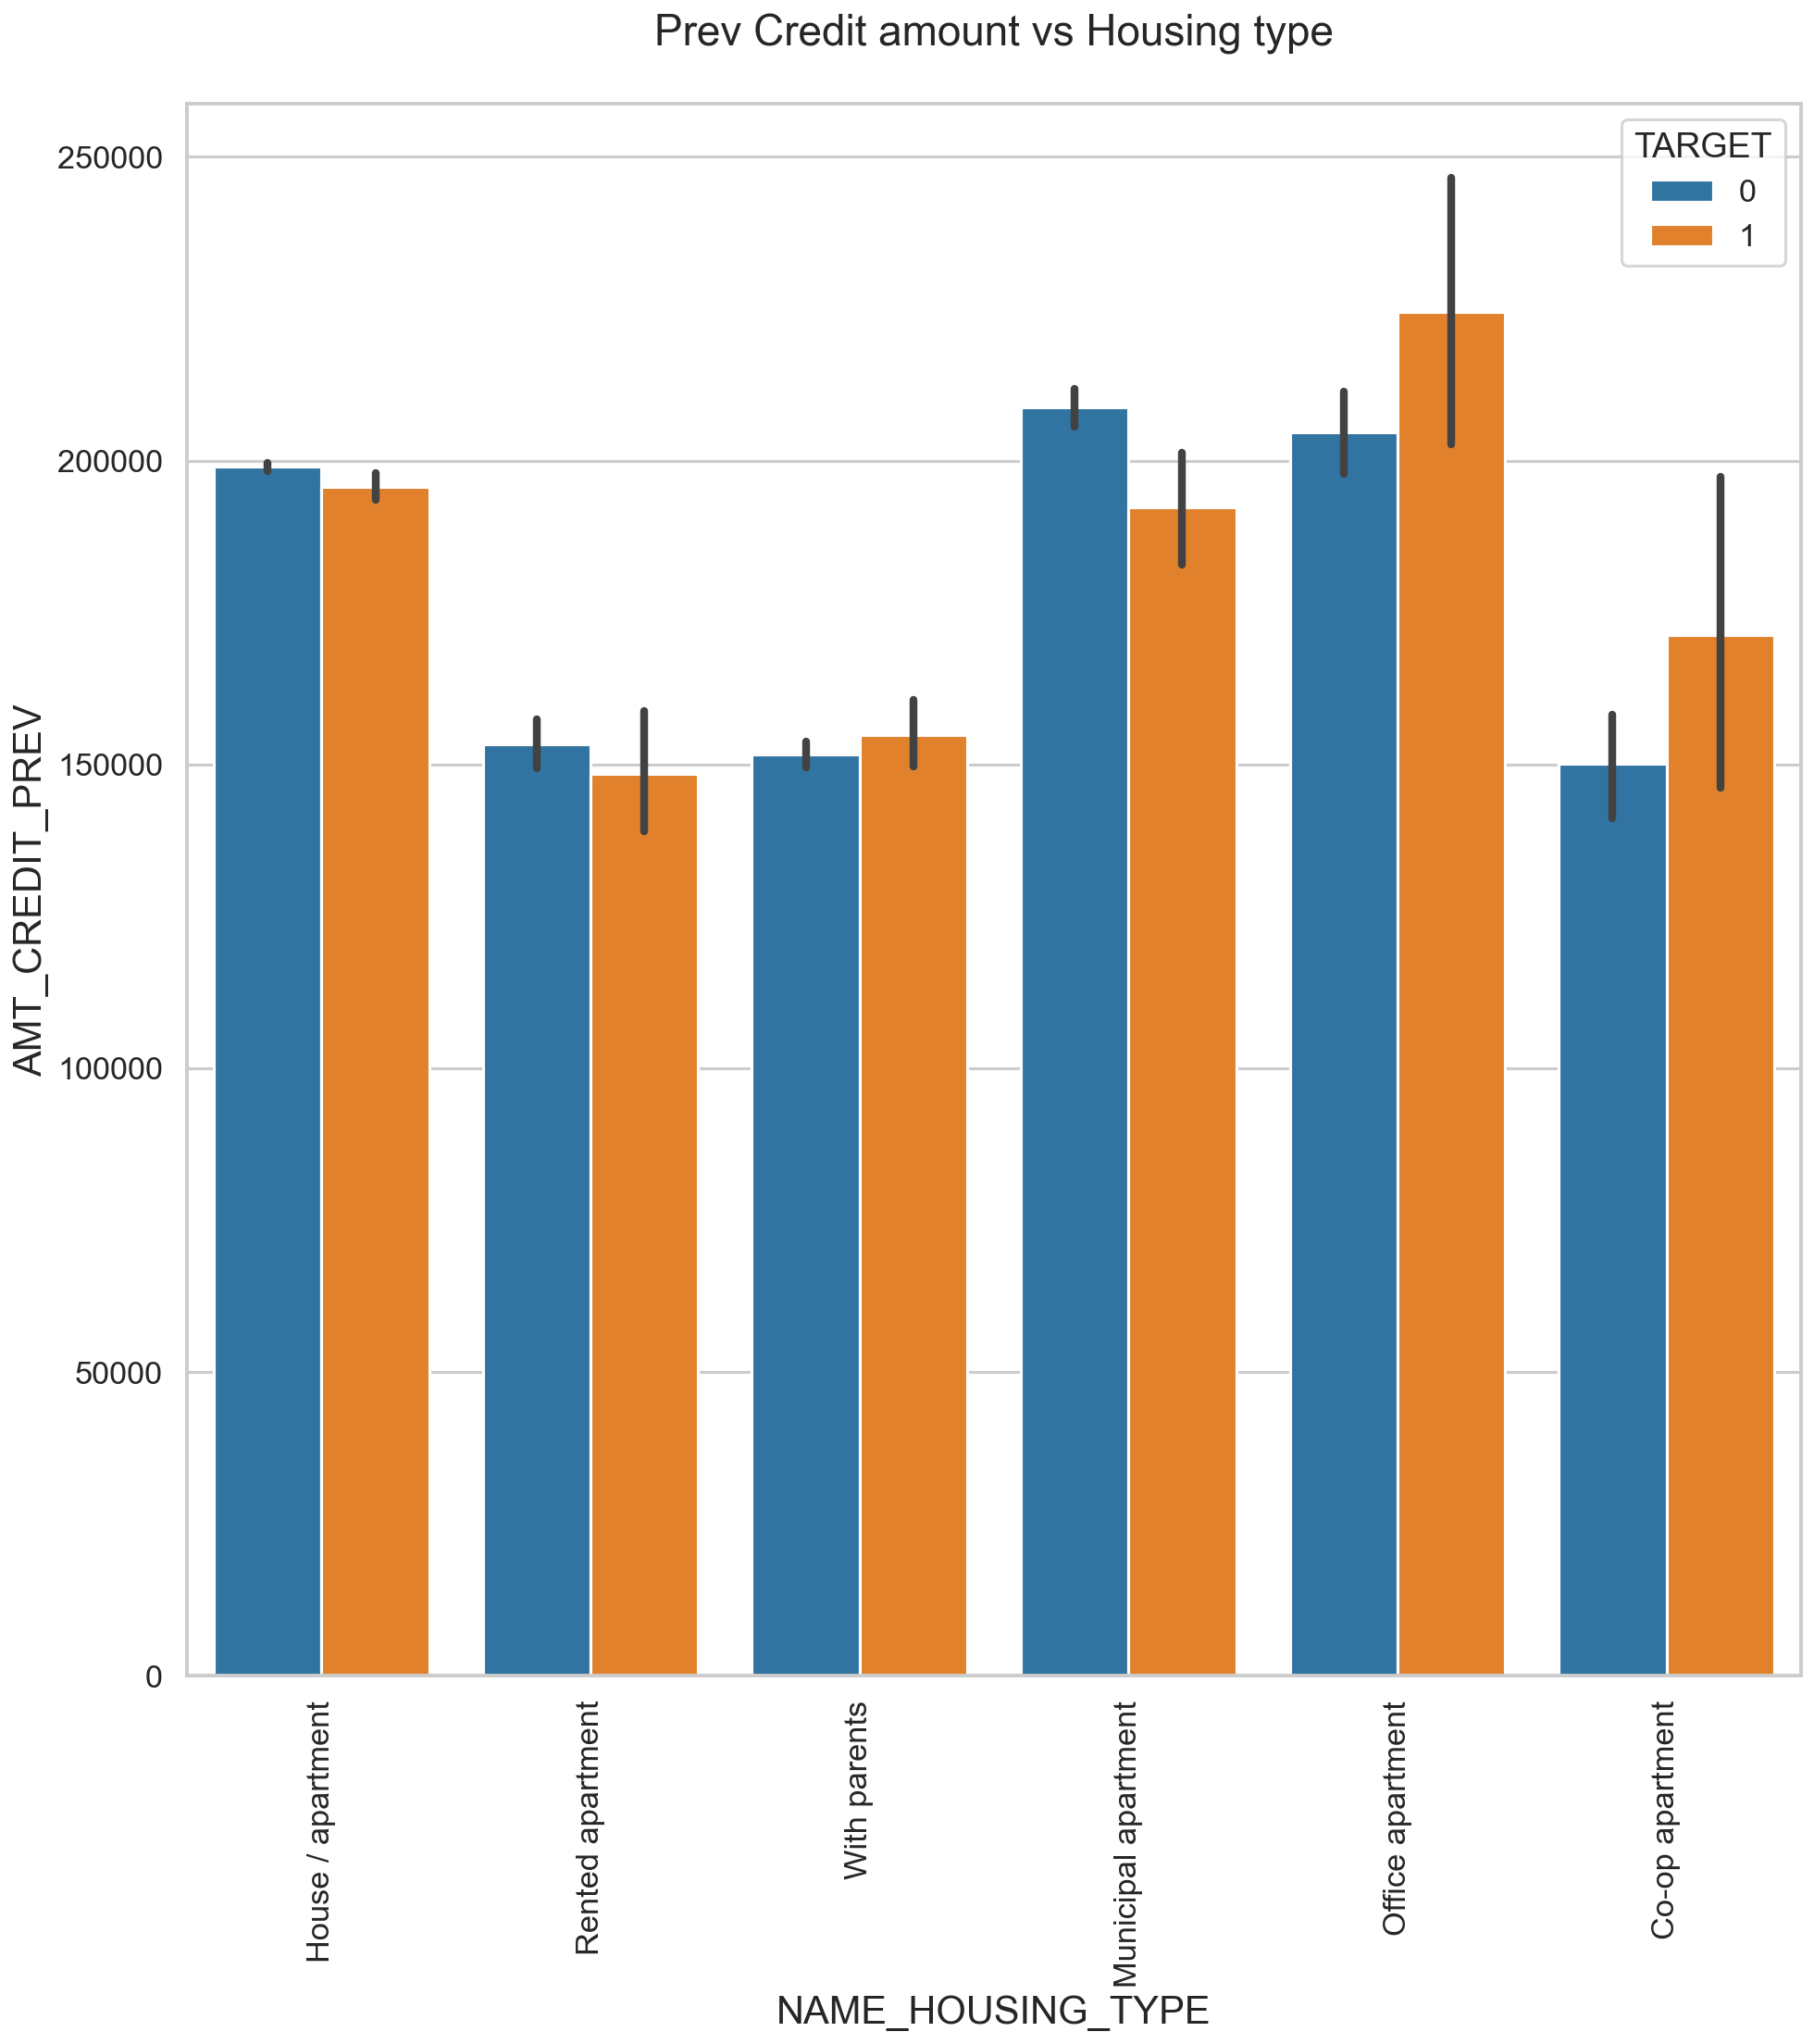

In [66]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(15,15),dpi = 150)
plt.xticks(rotation=90)
sns.barplot(data =df_comb, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# 6. Conclusion/Recomendation:

**1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.**

**2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.**

**3. In loan purpose ‘Repairs’:**

> a. Although having higher number of rejection in loan purposes with 'Repairs' there are observed difficulties in payment on time.<br> 
b. There are few places where loan payment is delay is significantly high.<br> 
c. Bank should keep continue to caution while giving loan for this purpose.

**4. Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.**

**5. Bank can focus mostly on housing type ‘with parents’ , ‘House\apartment’ and ‘municipal apartment’ for successful payments.**
